In [258]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**PROJET-2**                           **ANALYSE DES DONNEES DE SYSTEMES EDUCATIFS**_____________________________


**1** -PROBLEMATIQUE

**2** -PRESENTATION DU JEU DU JEU DONNEES 

**3** -ANALYSE PRE-EXPLORATOIRE DU JEU DE DONNEES 

**4**- CONCATENATION DE FICHIERS SELECTIONNES SI NECESSAIRES

**5**- SELECTION DES LIGNES DU FICHIER FINAL RESULTANT DE LA CONCATENATION

**6**- ANALYSE EXPLORATOIRE DU JEU DEDONNEES

**7**- SCORING ET RECOMMANDATIONS 






####1 -**PROBLEMATIQUE**
   
   La start-up de la EdTech, nommée academy, propose des contenus de  

   formation en ligne 
   pour un public de niveau lycée et université.   
   
  Dans le cadre d’un projet d’expansion à l’international de l’entreprise, 

une première mission d’analyse exploratoire est initiée, afin de 

 déterminer si les données sur l’éducation de la banque mondiale 

permettent d’informer le projet d’expansion.

Ci-dessous les différentes questions à explorer :

    •    Quels sont les pays avec un fort potentiel de clients pour nos 
         services ?
    •    Pour chacun de ces pays, quelle sera l’évolution de ce 
         potentiel de clients ?
    •    Dans quels pays l'entreprise doit-elle opérer en priorité ?



#### 2 -**PRESENTATION JEUX DE DONNEES**

   1-Sources:
       
       https://datacatalog.worldbank.org/dataset/education-statistics
       
       http://datatopics.worldbank.org/education/
        
   2-Fichiers:
  .
       
       EdStatsData: 
                  Est le fichier de base :nous renseigne sur les codes pays, les codes series, les relevés des taux(réels ou estimés 
                  et  prospectifs) sur une periode allant de 1970 à 2100.

                 nombfre de lignes: 886930 
                 nombre de colonnes: 70
                 nombre de données dupliquées: 0

       EdStatsCountry:
                 Contient des informations sur les pays, les regions et leur niveau de revenu. 

                 nombfre de lignes: 241
                 nombre de colonnes: 32
                 nombre de données dupliquées:0

       EdStatsCountry-Series:
                 contient des informations sur les code pays , les codes series et leur description. 

                 nombfre de lignes: 613
                 nombre de colonnes: 4
                 nombre de données dupliquées: 0
       
       EdStatsFootNote:
                 Contient des informations sur les pays, les series code ainsi la description des années de collecte de données. 

                 nombfre de lignes: 643638
                 nombre de colonnes: 5
                 nombre de données dupliquées:0
       
       EdStatsSerie:
                 Fournit des informations sur les codes series ainsi que la composition des populations.

                 nombfre de lignes: 3665
                 nombre de colonnes: 21 
                 nombre de données dupliquées: 0
    
        

#### 3 -**ANALYSE PRE-EXPLORATOIRE DU JEU DE DONNEES**

       • Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données
         manquantes, dupliquées ?)
      
       • Décrire les informations contenues dans le jeu de données (nombre de colonnes ?
         nombre de lignes ?)
      
       • Sélectionner les informations qui semblent pertinentes pour répondre à la
         problématique (quelles sont les colonnes contenant des informations qui peuvent être
         utiles pour répondre à la problématique de l’entreprise ?)
      
       • Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les
         différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par
         pays et par continent ou bloc géographique)


In [259]:
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import missingno as msno
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


"""
    EXAMEN DES CINQ JEUX DE DONNEES:
    
        EdStatsData
        EdStatsCountry: 241 observations 32 variables
        EdStatsCountry-Series.
        EdStatsFootNote.
        EdStatsSeries
"""

In [260]:
# Choix des op^tions
pd.options.display.max_columns=None
pd.set_option("precision", 2)

In [261]:
# path1='/media/pcb/01F574072F7A8694/O_DATA/'
path1='/content/drive/MyDrive/Projet P2/Projet+Python_Dataset_Edstats_csv/'


In [262]:
#======LECTURES DES FICHIERS DU JEU DE DONNEES

EdStatsCountrySeries_df=pd.read_csv(path1+'EdStatsCountry-Series.csv')
EdStatsCountry_df=pd.read_csv(path1+'EdStatsCountry.csv')
EdStatsFootNote_df=pd.read_csv(path1+'EdStatsFootNote.csv')
EdStatsSeries_df=pd.read_csv(path1+'EdStatsSeries.csv')
EdStatsData_df=pd.read_csv(path1+'EdStatsData.csv')


#### REMARQUE:

     Compte tenu du contexte  les pays elligible doivent:
        
        *posseder  des infrastructures internet.
        
        *Un population conséquente en nombre et 
        
        *elligible pour l acces au lycee et université mais aussi
        
        *ayant des moyens pour payer le service proposé.
        
     Nous rechercherons donc des mots cles relatifs et d'autres critères au fur et à mesure de notre progression dans l'étude.   
        
        
  

In [263]:
# Fonction de data preparation des données

def  data_preparation(data):
    # Nombre d'observations et de variables
            print('1-***Nombre d\'observations et de variables:',data.shape,'\n')
            #Examen des premieres lignes 
            print('2-***Examen des premieres lignes:\n\n',data.head(10),'\n')
            #Examen des dernieres lignes 
            print('3-***Examen des dernieres lignes:\n\n',data.tail(),'\n\n')
            #Informations supplementaires
            print('\n\n 4-***Informations supplementaires:\n\n')
            print(data.info(),'\n\n')
            #Valeurs manquantes
            print('5-***Valeurs manquantes:\n\n',data.isnull().sum(),'\n\n')
            #Pourcentage de valeurs manquantes par variables
            print('6-Pourcentage de valeurs manquantes par variables:\n\n',data.isnull().sum()/data.shape[0]*100,'\n\n')
            # Examinons le phenomene avec un tracé
            print('7-Graphiques de valeurs manquantes :\n\n')
            #print(msno.matrix(data))
            # 8 Graphique Ã  barre de valeurs existantes
            print('8-Graphiques en barre de valeurs manquantes :\n\n')
            msno.bar(data)    #PROBLEME DE JUXTAPOSITION DE GRAPHIQUE
            # Calcul des pourcentages
            # 0-Nombre total d'emplacements de valeurs
            nbre_tot_cellules=data.shape[0]*data.shape[1]
            # 1-Pourcentage de valeurs manquantes
            print("9-Pourcentage total de valeurs manquantes:",(nbre_tot_cellules-data.count().sum())/nbre_tot_cellules*100)
            # 2-Pourcentage de valeurs manquantes
            print("10-Pourcentage total de valeurs presentes:",(data.count().sum())/nbre_tot_cellules*100)
            # Donnees dupliquees
            print("11-Nombre d'obsevations dupliquées:",data.duplicated().sum())
            # Examinons les noms de variables 
            print('12-Affichage vriables:\n\n')
            print(data.columns)
            # Description Statistiques 
            print('\n\n12-Description Statistique:\n\n')
            print(data.describe())
            

#####**1- Fichier EdStatsCountry**=======================================================================

1-***Nombre d'observations et de variables: (241, 32) 

2-***Examen des premieres lignes:

   Country Code            Short Name            Table Name  \
0          ABW                 Aruba                 Aruba   
1          AFG           Afghanistan           Afghanistan   
2          AGO                Angola                Angola   
3          ALB               Albania               Albania   
4          AND               Andorra               Andorra   
5          ARB            Arab World            Arab World   
6          ARE  United Arab Emirates  United Arab Emirates   
7          ARG             Argentina             Argentina   
8          ARM               Armenia               Armenia   
9          ASM        American Samoa        American Samoa   

                      Long Name 2-alpha code   Currency Unit  \
0                         Aruba           AW   Aruban florin   
1  Islamic State of Afghanistan           AF  Afghan afghani   
2   People's Republic of Angola  

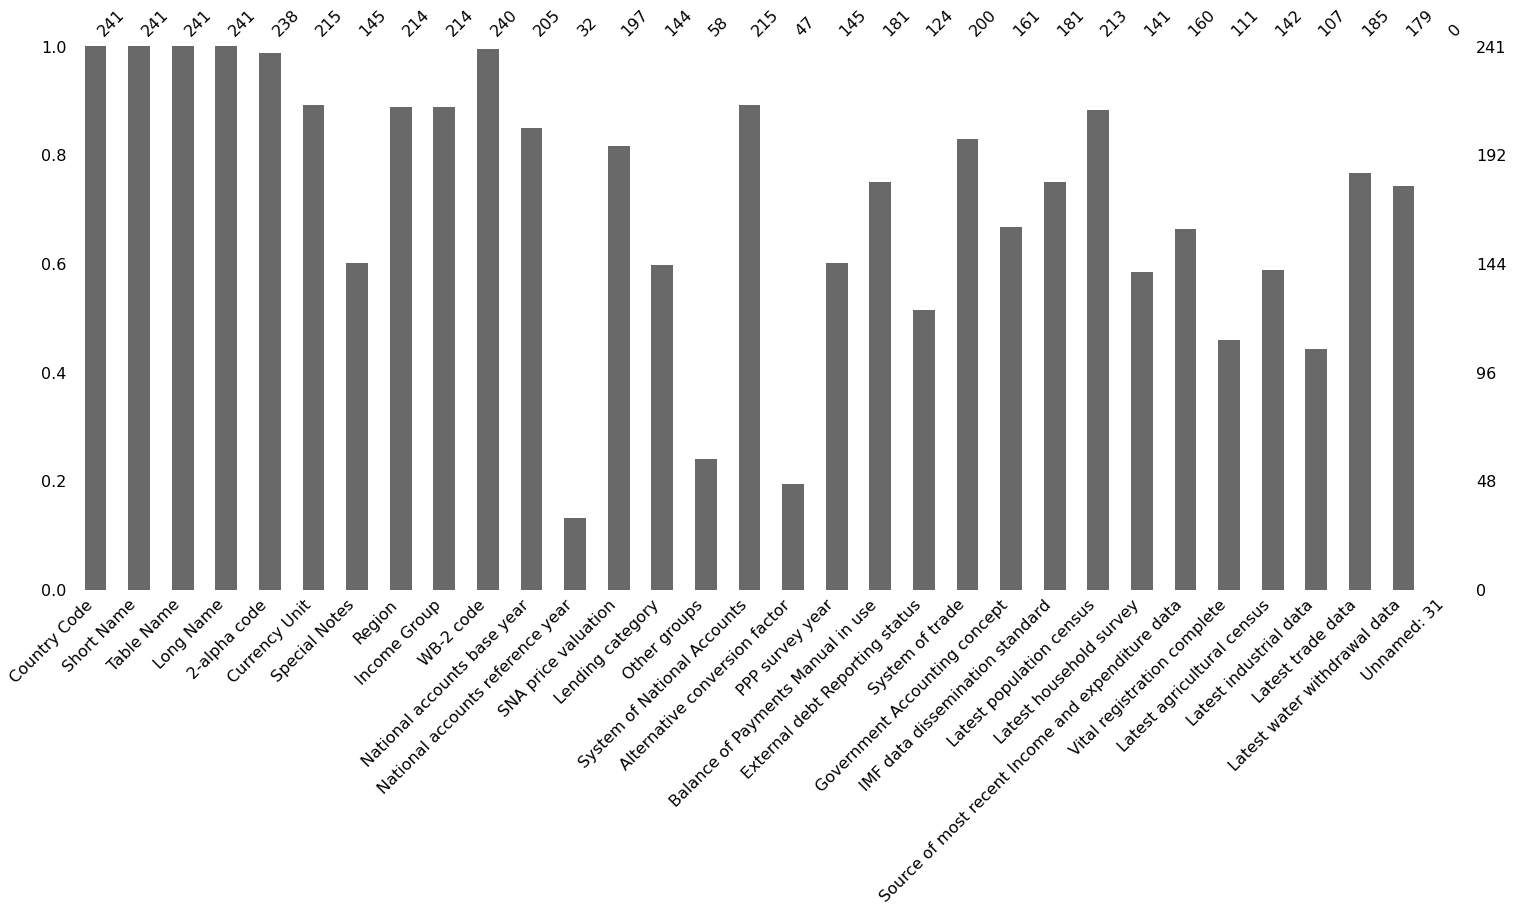

In [264]:
data_preparation(EdStatsCountry_df)

#####**2- Fichier EdStatsCountry-Series**=======================================================================

1-***Nombre d'observations et de variables: (613, 4) 

2-***Examen des premieres lignes:

   CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   
5         AFG  NY.GDP.MKTP.PP.KD   
6         AFG  NY.GNP.MKTP.PP.CD   
7         AFG  NY.GDP.MKTP.PP.CD   
8         AFG  NY.GDP.PCAP.PP.KD   
9         AFG  NY.GNP.PCAP.PP.CD   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN  
5                 Estimates are based on regression.         NaN  
6                 Estimates are based on re

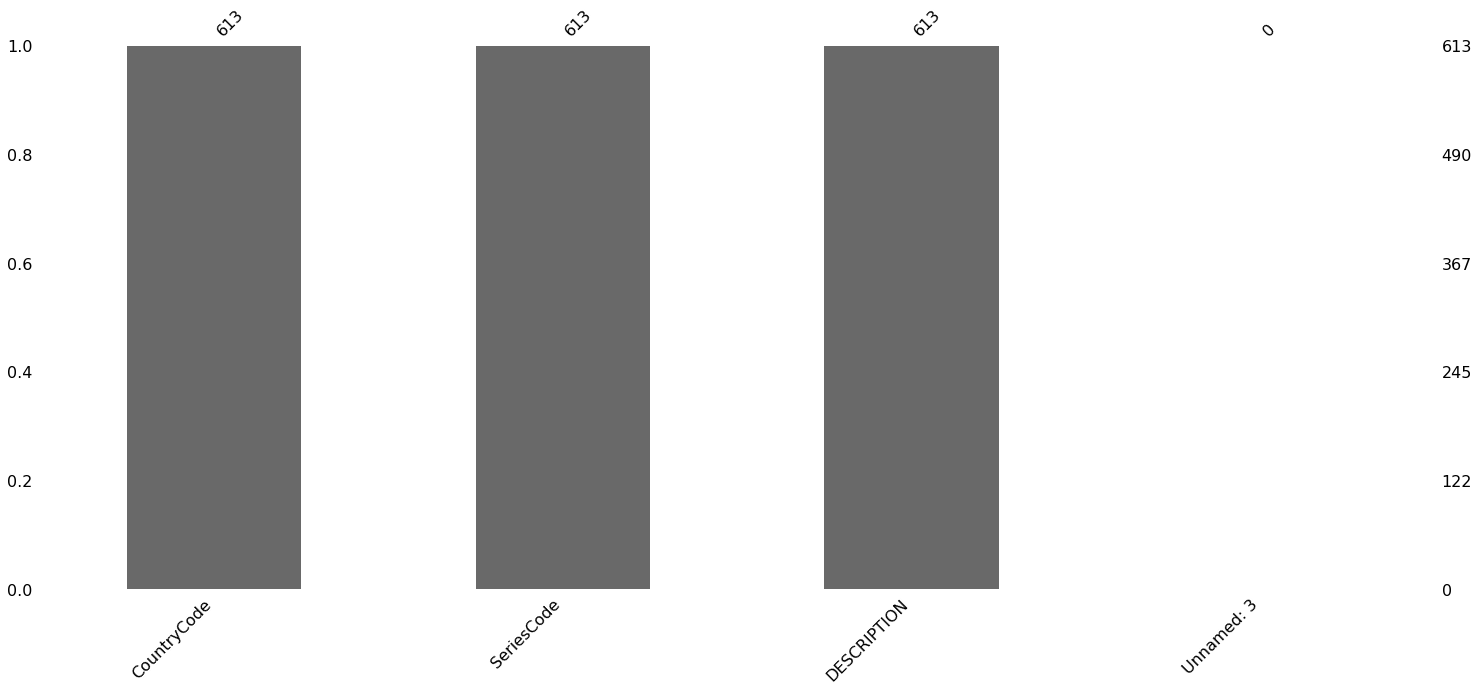

In [265]:
data_preparation(EdStatsCountrySeries_df)

#####**3- Fichier EdStatsFootNote**=======================================================================

1-***Nombre d'observations et de variables: (643638, 5) 

2-***Examen des premieres lignes:

   CountryCode         SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW     SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW     SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW     SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW     SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW        SE.PRE.TCHR  YR2006  Country estimation.         NaN
5         ABW        SE.PRE.NENR  YR2000  Country estimation.         NaN
6         ABW  SE.SEC.ENRL.VO.FE  YR2005  Country estimation.         NaN
7         ABW     SE.SEC.ENRL.GC  YR2003  Country estimation.         NaN
8         ABW     SE.PRM.TCHR.FE  YR1999  Country estimation.         NaN
9         ABW  SE.PRE.TCHR.FE.ZS  YR2008  Country estimation.         NaN 

3-***Examen des dernieres lignes:

        CountryCode   SeriesCode    Year  \
643633     

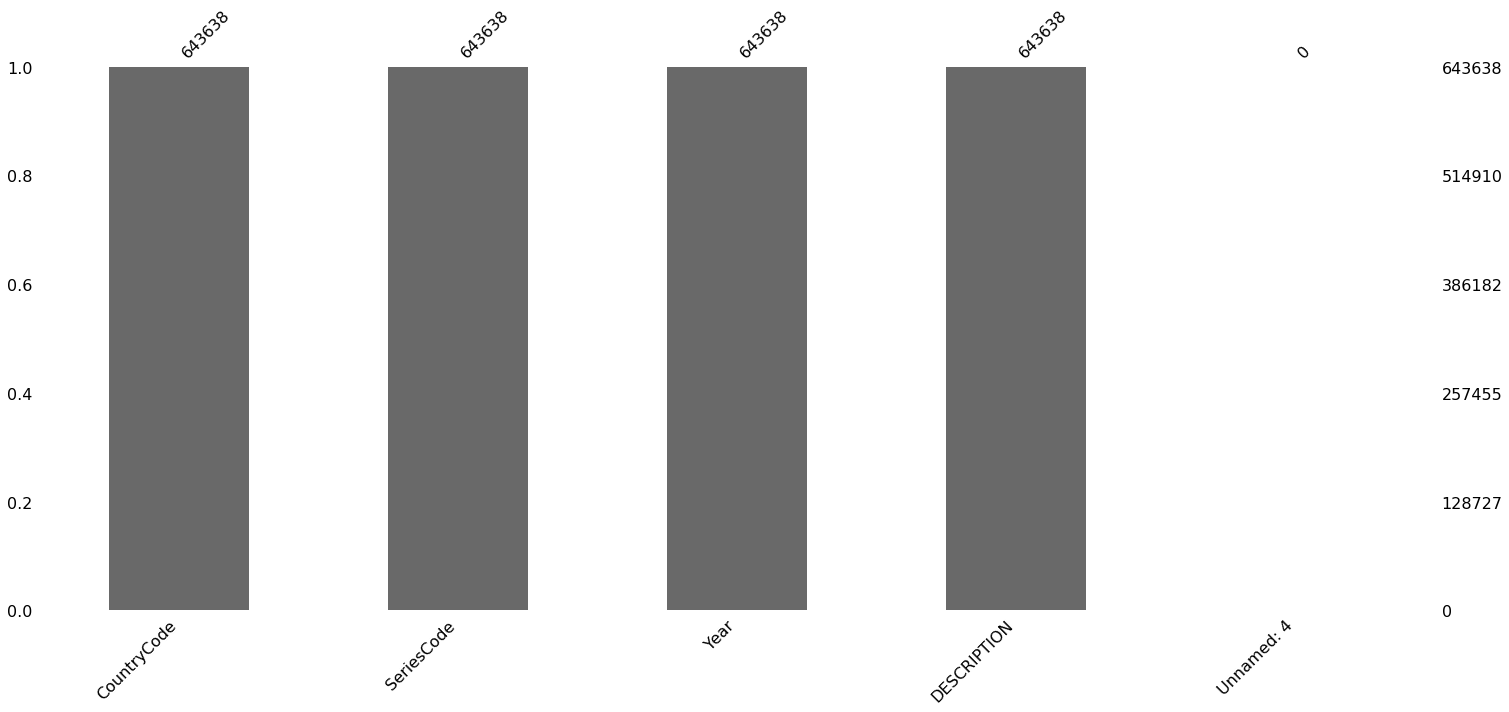

In [266]:
data_preparation(EdStatsFootNote_df)

#####**4- Fichier EdStatsSeries**=======================================================================

1-***Nombre d'observations et de variables: (3665, 21) 

2-***Examen des premieres lignes:

            Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   
5     BAR.NOED.2024.ZS  Attainment   
6  BAR.NOED.2529.FE.ZS  Attainment   
7     BAR.NOED.2529.ZS  Attainment   
8  BAR.NOED.25UP.FE.ZS  Attainment   
9     BAR.NOED.25UP.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   
5  Barro-Lee: Percentage of population age 20-24 ...   
6  Barro-Lee: Percentage of female population age...   
7  Barro-Lee: Percentage of population a

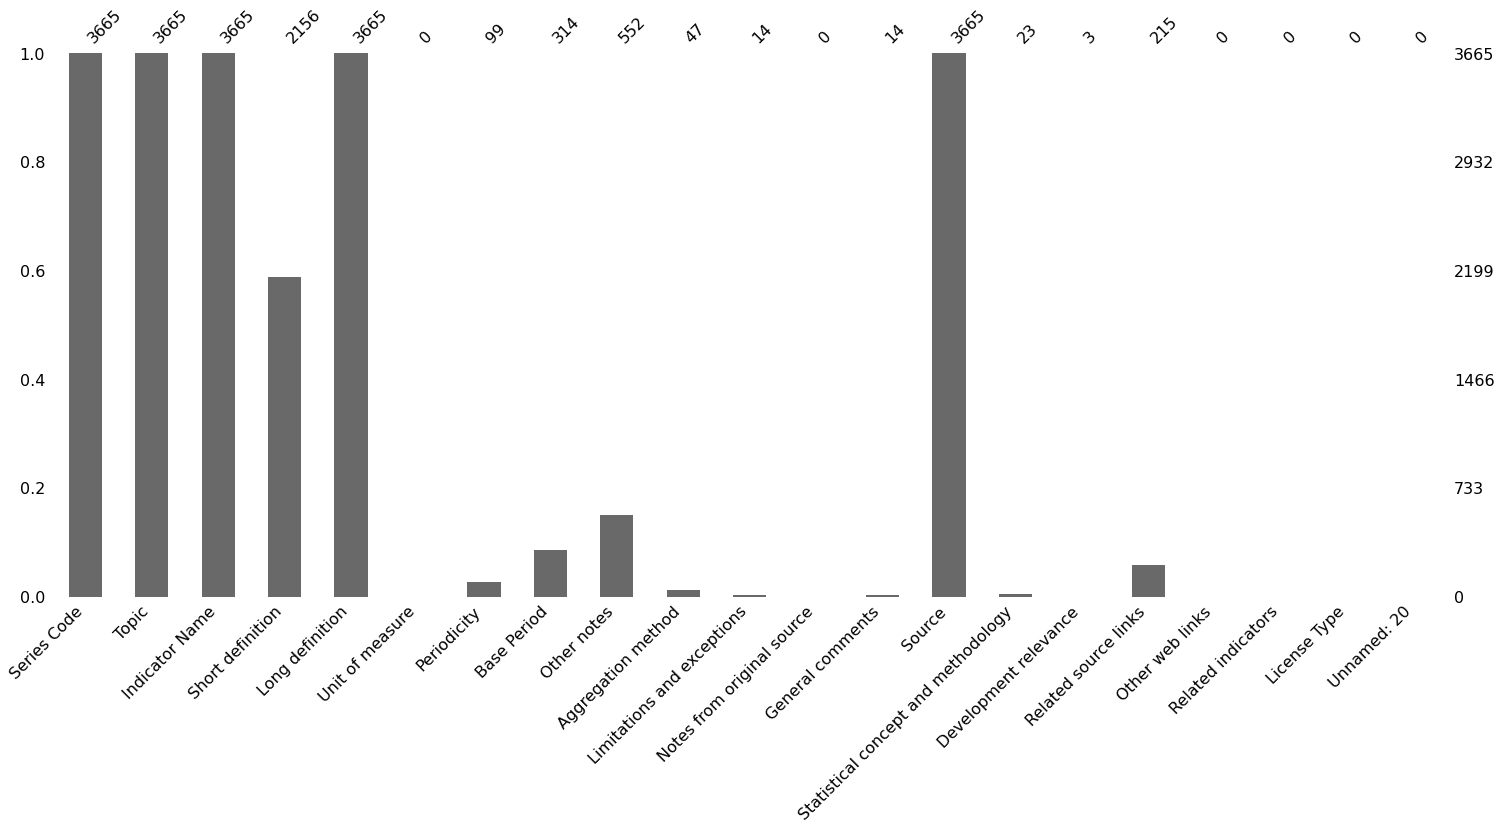

In [267]:
data_preparation(EdStatsSeries_df)

#####**5- Fichier EdStatsData**=======================================================================

1-***Nombre d'observations et de variables: (886930, 70) 

2-***Examen des premieres lignes:

   Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   
5   Arab World          ARB   
6   Arab World          ARB   
7   Arab World          ARB   
8   Arab World          ARB   
9   Arab World          ARB   

                                      Indicator Name  Indicator Code   1970  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2    NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F    NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI    NaN   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M    NaN   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR  54.82   
5   Adjusted net enrolment rate, primary, female (%)  SE.PRM.TENR.FE  43.35   
6  Adjuste

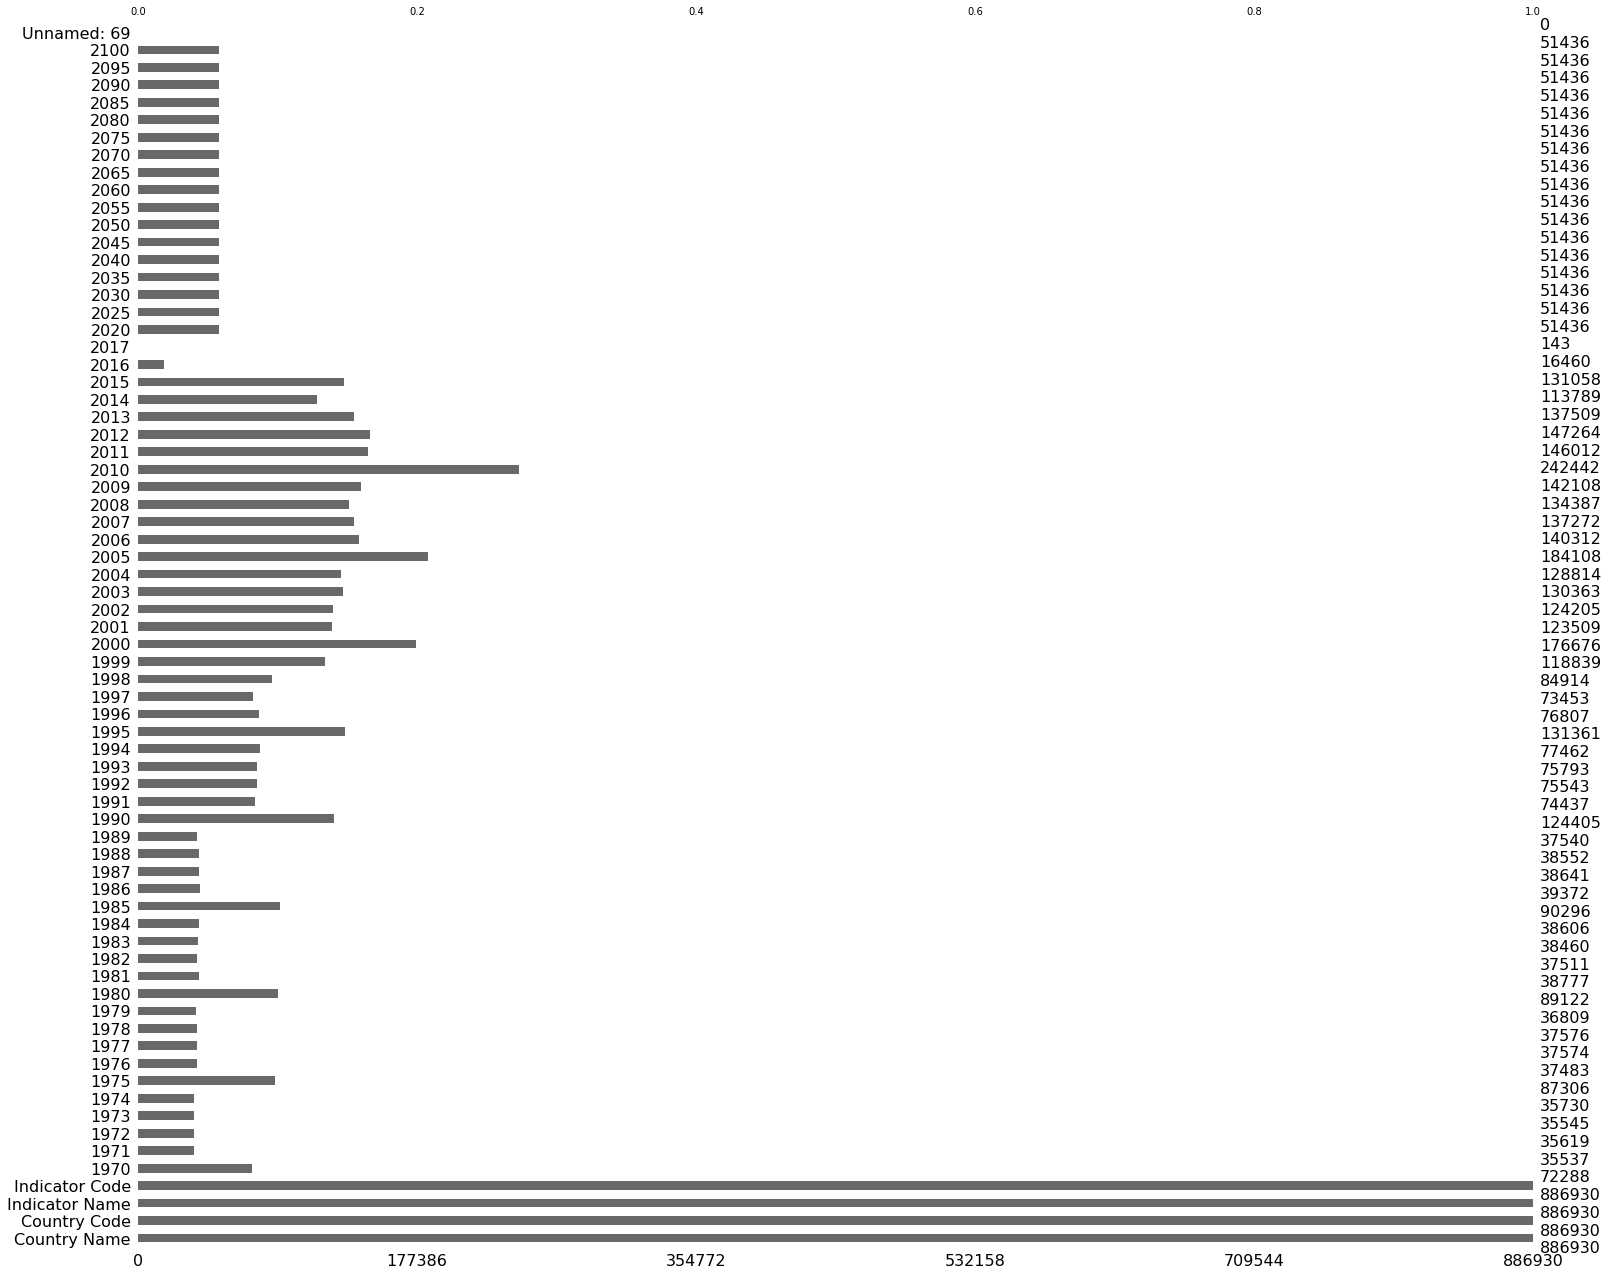

In [268]:
data_preparation(EdStatsData_df)

L' année  2010  à le taux de remplissage le plus élevé parmis   toutes les années de la série.

####4- CONCATENATION DE FICHIERS SELECTIONNES SI NECESSAIRES

In [269]:
# Affichage des noms de variables
print("Affichage de noms de variables des fichiers",'\n\n')
print("1-Fichier EdStatsData******\n\n",EdStatsData_df.columns,'\n\n',
      "2-Fichier EdStatsCountry******\n\n",EdStatsCountry_df.columns,'\n\n',
      "3-Fichier EdStatsFootNote******\n\n",EdStatsFootNote_df.columns,'\n\n',
      "4-Fichier EdStatsCountrySeries******\n\n",EdStatsCountrySeries_df.columns,'\n\n',
      "5-Fichier EdStatsSeries******\n\n",EdStatsSeries_df.columns
     )


Affichage de noms de variables des fichiers 


1-Fichier EdStatsData******

 Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object') 

 2-Fichier EdStatsCountry******

 Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 

#####VARIABLES RETENUES: selection de variables utiles  et creation  de nouveaux fichiers






In [270]:
# 1-Nouveau  fichier  EdStatsDat
new_EdStatsData_df=EdStatsData_df[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014','2015',]]
# 2-Nouveau  fichier  EdStatsCountry
new_EdStatsCountry_df=EdStatsCountry_df[['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code']] 
# 3-Nouveau  fichier  EdStatsCountry
new_EdStatsFootNote_df=EdStatsFootNote_df[['CountryCode','SeriesCode', 'Year', 'DESCRIPTION']] 
# 4-Nouveau  fichier  EdStatsCountry
new_EdStatsCountrySeries_df=EdStatsCountrySeries_df[['CountryCode', 'SeriesCode', 'DESCRIPTION']] 
# 2-Nouveau  fichier  EdStatsCountry
new_EdStatsSeries_df=EdStatsSeries_df[['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Development relevance',
       'Related indicators',]] 
             

In [271]:
new_EdStatsData_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,76.25,77.25,78.8,80.05,80.81,81.61,82.49,82.69,83.28,84.01,84.2,85.21,85.25,86.1,85.51,85.32,NaN


#####MERGE

In [272]:
# merge 
EdStats_Data_Series_Merge_df=pd.merge(
    new_EdStatsData_df,
    new_EdStatsSeries_df,
    how='left',
    left_on='Indicator Code',
    right_on='Series Code'
)


In [273]:
EdStats_Data_Series_Merge_df.head()

,Country Name,Country Code,Indicator Name_x,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Series Code,Topic,Indicator Name_y,Short definition,Long definition,Unit of measure,Development relevance,Related indicators
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UIS.NERA.2,Secondary,"Adjusted net enrolment rate, lower secondary, ...",NaN,Total number of students of the official lower...,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UIS.NERA.2.F,Secondary,"Adjusted net enrolment rate, lower secondary, ...",NaN,Total number of female students of the officia...,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UIS.NERA.2.GPI,Secondary,"Adjusted net enrolment rate, lower secondary, ...",NaN,Ratio of female adjusted net enrolment rate fo...,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UIS.NERA.2.M,Secondary,"Adjusted net enrolment rate, lower secondary, ...",NaN,Total number of male students of the official ...,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,76.25,77.25,78.8,80.05,80.81,81.61,82.49,82.69,83.28,84.01,84.2,85.21,85.25,86.1,85.51,85.32,NaN,SE.PRM.TENR,Primary,"Adjusted net enrolment rate, primary, both sex...",NaN,Total number of students of the official prima...,NaN,NaN,NaN


In [274]:
EdStats_Data_Series_Merge_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name_x', 'Indicator Code',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       'Series Code', 'Topic', 'Indicator Name_y', 'Short definition',
       'Long definition', 'Unit of measure', 'Development relevance',
       'Related indicators'],
      dtype='object')

#####RECHERCHE D INDICATEURS:
    
    Mots cles de recherche: 
                         internet
                         population
                         secondary
                         tertiary
                         Income
                         ....

In [275]:
indicateur_internet=EdStats_Data_Series_Merge_df['Indicator Code'][EdStats_Data_Series_Merge_df['Indicator Name_x'].str.contains('Internet')]
print(indicateur_internet.unique())


['IT.NET.USER.P2']


#####REMARQUE:

Nous avons un premier indicateur sur les infrastructures internet: IT.NET.USER.P2


In [276]:
indicateur_population=EdStats_Data_Series_Merge_df['Indicator Code'][EdStats_Data_Series_Merge_df['Indicator Name_x'].str.contains('population')]
indicateur_population.unique()

array(['UIS.LPP.AG15T99', 'UIS.LP.AG15T99', 'UIS.LP.AG15T99.F',
       'UIS.LP.AG15T99.M', 'SE.ADT.LITR.ZS', 'SE.ADT.LITR.FE.ZS',
       'UIS.LR.AG15T99.GPI', 'SE.ADT.LITR.MA.ZS', 'BAR.NOED.15UP.FE.ZS',
       'BAR.PRM.CMPT.15UP.FE.ZS', 'BAR.PRM.ICMP.15UP.FE.ZS',
       'BAR.SEC.CMPT.15UP.FE.ZS', 'BAR.SEC.ICMP.15UP.FE.ZS',
       'BAR.TER.CMPT.15UP.FE.ZS', 'BAR.TER.ICMP.15UP.FE.ZS',
       'BAR.NOED.1519.FE.ZS', 'BAR.PRM.CMPT.1519.FE.ZS',
       'BAR.PRM.ICMP.1519.FE.ZS', 'BAR.SEC.CMPT.1519.FE.ZS',
       'BAR.SEC.ICMP.1519.FE.ZS', 'BAR.TER.CMPT.1519.FE.ZS',
       'BAR.TER.ICMP.1519.FE.ZS', 'BAR.NOED.2024.FE.ZS',
       'BAR.PRM.CMPT.2024.FE.ZS', 'BAR.PRM.ICMP.2024.FE.ZS',
       'BAR.SEC.CMPT.2024.FE.ZS', 'BAR.SEC.ICMP.2024.FE.ZS',
       'BAR.TER.CMPT.2024.FE.ZS', 'BAR.TER.ICMP.2024.FE.ZS',
       'BAR.NOED.25UP.FE.ZS', 'BAR.PRM.CMPT.25UP.FE.ZS',
       'BAR.PRM.ICMP.25UP.FE.ZS', 'BAR.SEC.CMPT.25UP.FE.ZS',
       'BAR.SEC.ICMP.25UP.FE.ZS', 'BAR.TER.CMPT.25UP.FE.ZS',
       'BAR.TER.

Essayons de raffiner  car liste difficilement exploitable

In [277]:
EdStatsData_df['Indicator Code'][EdStatsData_df['Indicator Name'].str.contains('15-24')]


2480         SP.POP.1524.FE.UN
2481         SP.POP.1524.MA.UN
2482         SP.POP.1524.TO.UN
3657           UIS.LPP.AG15T24
3658            UIS.LP.AG15T24
                  ...         
886925        UIS.LP.AG15T24.M
886926       SE.ADT.1524.LT.ZS
886927    SE.ADT.1524.LT.FE.ZS
886928    SE.ADT.1524.LT.FM.ZS
886929    SE.ADT.1524.LT.MA.ZS
Name: Indicator Code, Length: 2662, dtype: object

Ici nous avons en evidence des indicateurs sur la population

In [278]:
# Essayons le mot clé SP.POP  decrivant la population
EdStats_Data_Series_Merge_df['Indicator Code'][EdStats_Data_Series_Merge_df['Indicator Code'].str.contains('SP.POP.')]

2307            SP.POP.GROW
2341      SP.POP.AG00.FE.UN
2342      SP.POP.AG00.MA.UN
2343      SP.POP.AG00.TO.UN
2344      SP.POP.AG01.FE.UN
                ...        
885794    SP.POP.TOTL.FE.IN
885795    SP.POP.TOTL.FE.ZS
885796    SP.POP.TOTL.MA.IN
885797    SP.POP.TOTL.MA.ZS
885798          SP.POP.TOTL
Name: Indicator Code, Length: 46948, dtype: object

In [279]:
EdStats_Data_Series_Merge_df['Indicator Code'][EdStats_Data_Series_Merge_df['Indicator Name_x'].str.contains('tertiary')]

126        UIS.XSPENDP.4.FDPUB.FNS
131       UIS.XSPENDP.56.FDPUB.FNS
209           BAR.TER.SCHL.15UP.FE
210              BAR.TER.SCHL.15UP
211           BAR.TER.SCHL.1519.FE
                    ...           
886471            UIS.EA.5.AG25T99
886484        UIS.EA.5T8.AG25T99.F
886485      UIS.EA.5T8.AG25T99.GPI
886486        UIS.EA.5T8.AG25T99.M
886487          UIS.EA.5T8.AG25T99
Name: Indicator Code, Length: 75746, dtype: object

In [280]:
EdStats_Data_Series_Merge_df[['Indicator Code','Indicator Name_x']][EdStats_Data_Series_Merge_df['Indicator Code'].str.contains('SE.TER.ENRR')]

,Indicator Code,Indicator Name_x
1339,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)"
1340,SE.TER.ENRR.FE,"Gross enrolment ratio, tertiary, female (%)"
1342,SE.TER.ENRR.MA,"Gross enrolment ratio, tertiary, male (%)"
5004,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)"
5005,SE.TER.ENRR.FE,"Gross enrolment ratio, tertiary, female (%)"
...,...,...
880940,SE.TER.ENRR.FE,"Gross enrolment ratio, tertiary, female (%)"
880942,SE.TER.ENRR.MA,"Gross enrolment ratio, tertiary, male (%)"
884604,SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)"
884605,SE.TER.ENRR.FE,"Gross enrolment ratio, tertiary, female (%)"


In [281]:
EdStats_Data_Series_Merge_df[['Indicator Code','Indicator Name_x']][EdStats_Data_Series_Merge_df['Indicator Code'].str.contains('.SEC.ENRR')]


,Indicator Code,Indicator Name_x
1307,SE.SEC.ENRR.LO,"Gross enrolment ratio, lower secondary, both s..."
1308,SE.SEC.ENRR.LO.FE,"Gross enrolment ratio, lower secondary, female..."
1310,SE.SEC.ENRR.LO.MA,"Gross enrolment ratio, lower secondary, male (%)"
1335,SE.SEC.ENRR,"Gross enrolment ratio, secondary, both sexes (%)"
1336,SE.SEC.ENRR.FE,"Gross enrolment ratio, secondary, female (%)"
...,...,...
884601,SE.SEC.ENRR.FE,"Gross enrolment ratio, secondary, female (%)"
884603,SE.SEC.ENRR.MA,"Gross enrolment ratio, secondary, male (%)"
884608,SE.SEC.ENRR.UP,"Gross enrolment ratio, upper secondary, both s..."
884609,SE.SEC.ENRR.UP.FE,"Gross enrolment ratio, upper secondary, female..."




```
# `Ce texte est au format code`
```

#####INDICATEURS RETENUES :

                 IT.NET.USER.P2:  Internet users (per 100 people) *Internautes (pour 100 personnes)*                            
                 
                 SP.POP.1524.TO.UN: Population, ages 15-24, total
                 
                 
                 SP.POP.GROW: Population growth (annual %) 
                             *Croissance démographique (% annuel)* 

                 NY.GDP.PCAP.CD: gross domestic product gdp 
                                *produit intérieur brut  PIB*
            
                 SE.SEC.ENRR	Gross enrolment ratio, secondary, both sexes
                             (%)*'Taux brut de scolarisation, secondaire, les deux sexes'*
                             

                 SE.TER.ENRR  Gross enrolment ratio, tertiary, both sexes (%) Taux brut de scolarisation, niveau  supérieur, les deux sexes
 


             

In [282]:
# Liste des indicateurs selectionnés
liste_indic_sel=['IT.NET.USER.P2','SP.POP.1524.TO.UN','SP.POP.GROW','NY.GDP.PCAP.CD','SE.SEC.ENRR','SE.TER.ENRR']

In [283]:
# AFFICHAGE OBSERVATIONS  AVEC SEULEMENT LES INDICATEURS SELECTIONNES
EdStats_Data_Series_Merge_df[EdStats_Data_Series_Merge_df['Indicator Code'].isin(liste_indic_sel)].head(5)

,Country Name,Country Code,Indicator Name_x,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Series Code,Topic,Indicator Name_y,Short definition,Long definition,Unit of measure,Development relevance,Related indicators
1245,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,2332.06,2615.68,2515.08,2499.34,2754.30,3168.19,3796.02,4414.09,5046.82,6255.76,5267.55,6032.96,7005.48,7571.40,7716.00,NaN,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,GDP per capita (current US$),NaN,GDP per capita is gross domestic product divid...,NaN,NaN,NaN
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,58.47,59.75,61.17,62.23,64.04,65.85,65.93,65.85,64.70,65.34,66.83,68.05,70.69,71.72,70.27,70.74,NaN,SE.SEC.ENRR,Secondary,"Gross enrolment ratio, secondary, both sexes (%)",NaN,"Total enrollment in secondary education, regar...",NaN,NaN,NaN
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,17.91,18.16,18.77,19.57,19.56,20.70,21.73,22.19,22.74,23.44,24.10,24.76,24.27,25.78,27.33,28.17,NaN,SE.TER.ENRR,Tertiary,"Gross enrolment ratio, tertiary, both sexes (%)",NaN,Total enrollment in tertiary education (ISCED ...,NaN,NaN,NaN
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,0.60,1.14,1.56,2.69,3.65,7.01,8.39,11.65,14.21,18.59,22.97,26.75,29.71,34.01,36.87,NaN,NaN,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),NaN,Internet users are individuals who have used t...,NaN,NaN,NaN
2307,Arab World,ARB,Population growth (annual %),SP.POP.GROW,2.02,2.08,2.14,2.18,2.21,2.27,2.31,2.36,2.39,2.38,2.32,2.23,2.13,2.06,2.01,NaN,NaN,SP.POP.GROW,Health: Population: Dynamics,Population growth (annual %),Annual population growth rate. Population is b...,Annual population growth rate for year t is th...,NaN,NaN,NaN


In [284]:
# Concatenation de fichiers
new_EdStats_Data_Series_Merge_df=EdStats_Data_Series_Merge_df[['Country Name', 'Country Code', 'Indicator Name_x', 'Indicator Code',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       'Series Code', 'Topic',]]

In [285]:
# Nous avons un nouveau fichier
new_EdStats_Data_Series_Merge_df.columns

Index(['Country Name', 'Country Code', 'Indicator Name_x', 'Indicator Code',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       'Series Code', 'Topic'],
      dtype='object')

##### NOUVEAUX TAUX DE VALEURS MANQUANTES/ GRAPHIQUE

In [286]:
new_EdStats_Data_Series_Merge_df.shape

(886930, 23)

In [287]:
taux_valeurs_manquantes=new_EdStats_Data_Series_Merge_df.isnull().sum()/new_EdStats_Data_Series_Merge_df.shape[0]
taux_valeurs_manquantes.sort_values()

Country Name        0.00
Country Code        0.00
Indicator Name_x    0.00
Indicator Code      0.00
Series Code         0.01
Topic               0.01
2010                0.73
2005                0.79
2000                0.80
2012                0.83
2011                0.84
2009                0.84
2006                0.84
2013                0.84
2007                0.85
2008                0.85
2015                0.85
2003                0.85
2004                0.85
2002                0.86
2001                0.86
1999                0.87
2014                0.87
dtype: float64

Les années 2010 et 2005 ont le moins de données manquantes.

Les années 2014 et 1999 ont le plus de valeurs manquantes

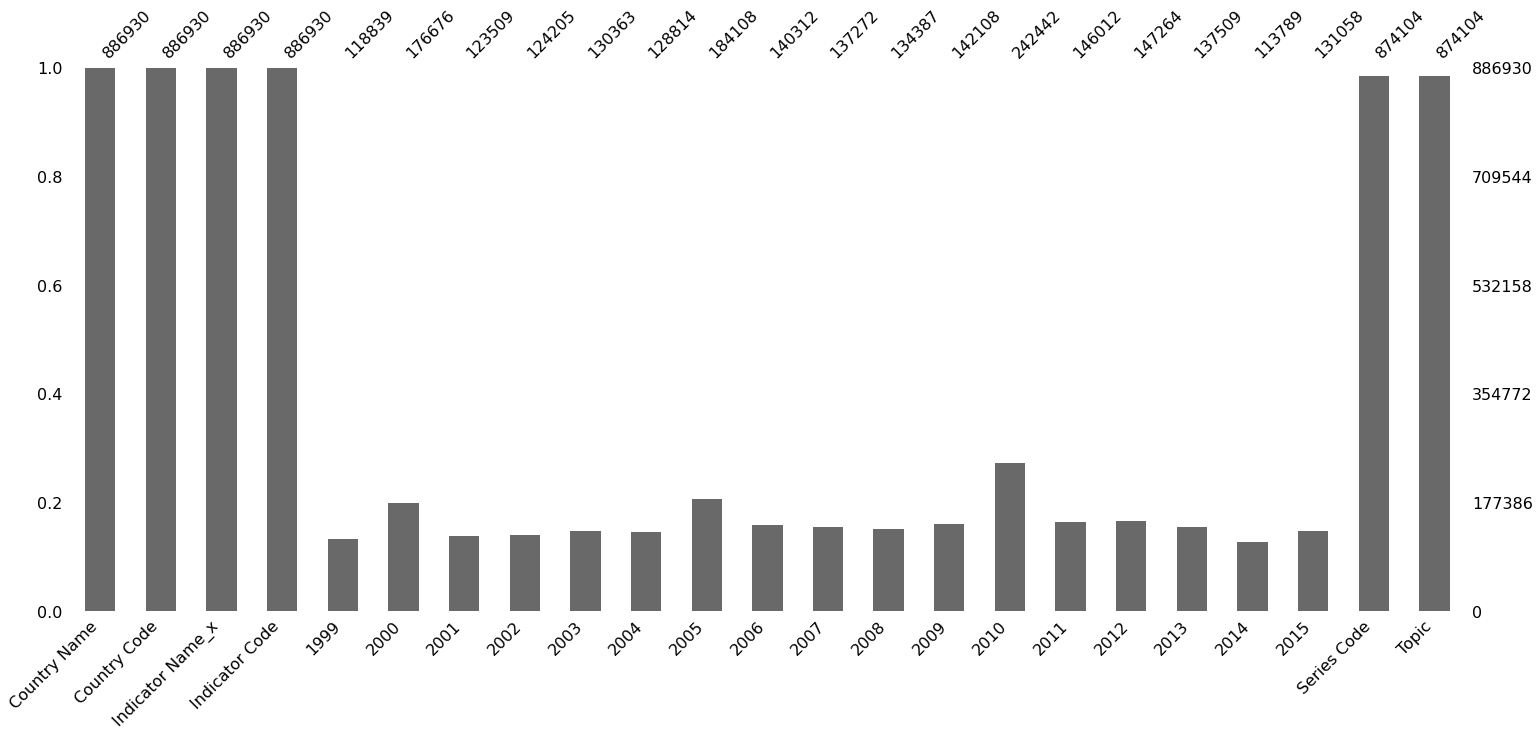

In [288]:
# GRAPHIQUE  TAUX VALEURS MANQUANTES
# plt.figure(figsize=(10,5)
# taux_valeurs_manquantes.plot(kind='bar')

msno.bar(new_EdStats_Data_Series_Merge_df)

<Figure size 1080x720 with 0 Axes>

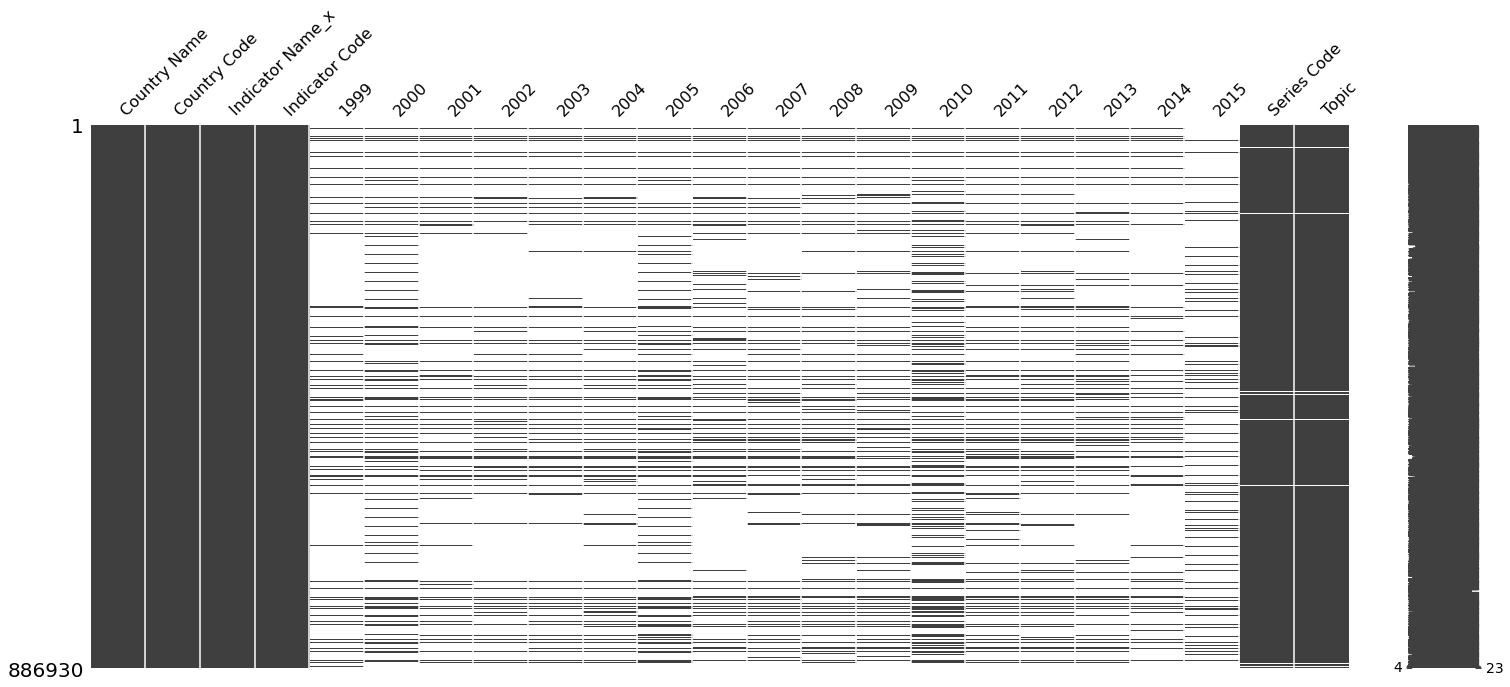

In [289]:
# Examinons la nouvelle configuration du fichier new_EdStats_Data_Series_Merge_df
plt.figure(figsize=(15, 10))
msno.matrix(new_EdStats_Data_Series_Merge_df)

#####REMARQUE:

A supprimer les 6 dernieres variables


In [290]:
# il nous faut les informations sur les region et revenu contenues dans le fichier EdStatsCountry
# merge 
EdStats_Data_Series_Country_Merge_df=pd.merge(
    new_EdStats_Data_Series_Merge_df,
    new_EdStatsCountry_df,
    how='left',
    left_on='Country Code',
    right_on='Country Code'
)

In [291]:
# Fichier Final  avec uniquement les indicateurs choisis

EdStats_final=EdStats_Data_Series_Country_Merge_df[EdStats_Data_Series_Country_Merge_df['Indicator Code'].isin(liste_indic_sel)]

EdStats_final.head(5)

,Country Name,Country Code,Indicator Name_x,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Series Code,Topic,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code
1245,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,2332.06,2615.68,2515.08,2499.34,2754.30,3168.19,3796.02,4414.09,5046.82,6255.76,5267.55,6032.96,7005.48,7571.40,7716.00,NaN,NaN,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A
1335,Arab World,ARB,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,58.47,59.75,61.17,62.23,64.04,65.85,65.93,65.85,64.70,65.34,66.83,68.05,70.69,71.72,70.27,70.74,NaN,SE.SEC.ENRR,Secondary,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A
1339,Arab World,ARB,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,17.91,18.16,18.77,19.57,19.56,20.70,21.73,22.19,22.74,23.44,24.10,24.76,24.27,25.78,27.33,28.17,NaN,SE.TER.ENRR,Tertiary,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,0.60,1.14,1.56,2.69,3.65,7.01,8.39,11.65,14.21,18.59,22.97,26.75,29.71,34.01,36.87,NaN,NaN,IT.NET.USER.P2,Infrastructure: Communications,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A
2307,Arab World,ARB,Population growth (annual %),SP.POP.GROW,2.02,2.08,2.14,2.18,2.21,2.27,2.31,2.36,2.39,2.38,2.32,2.23,2.13,2.06,2.01,NaN,NaN,SP.POP.GROW,Health: Population: Dynamics,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A


In [292]:
# Nouvelle dimension du fichier final
print("Dimension ancien fichier\n",EdStats_Data_Series_Country_Merge_df.shape,"\n")
print("Dimension nouveau fichier\n",EdStats_final.shape)

Dimension ancien fichier
 (886930, 32) 

Dimension nouveau fichier
 (1452, 32)


In [293]:
# Noms de colonnes retenues  pour l'instant 
EdStats_final.columns

Index(['Country Name', 'Country Code', 'Indicator Name_x', 'Indicator Code',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       'Series Code', 'Topic', 'Short Name', 'Table Name', 'Long Name',
       '2-alpha code', 'Currency Unit', 'Special Notes', 'Region',
       'Income Group', 'WB-2 code'],
      dtype='object')

In [294]:
EdStats_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 1245 to 885747
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      1452 non-null   object 
 1   Country Code      1452 non-null   object 
 2   Indicator Name_x  1452 non-null   object 
 3   Indicator Code    1452 non-null   object 
 4   1999              1195 non-null   float64
 5   2000              1186 non-null   float64
 6   2001              1195 non-null   float64
 7   2002              1213 non-null   float64
 8   2003              1202 non-null   float64
 9   2004              1216 non-null   float64
 10  2005              1212 non-null   float64
 11  2006              1201 non-null   float64
 12  2007              1205 non-null   float64
 13  2008              1200 non-null   float64
 14  2009              1205 non-null   float64
 15  2010              1205 non-null   float64
 16  2011              1215 non-null   flo

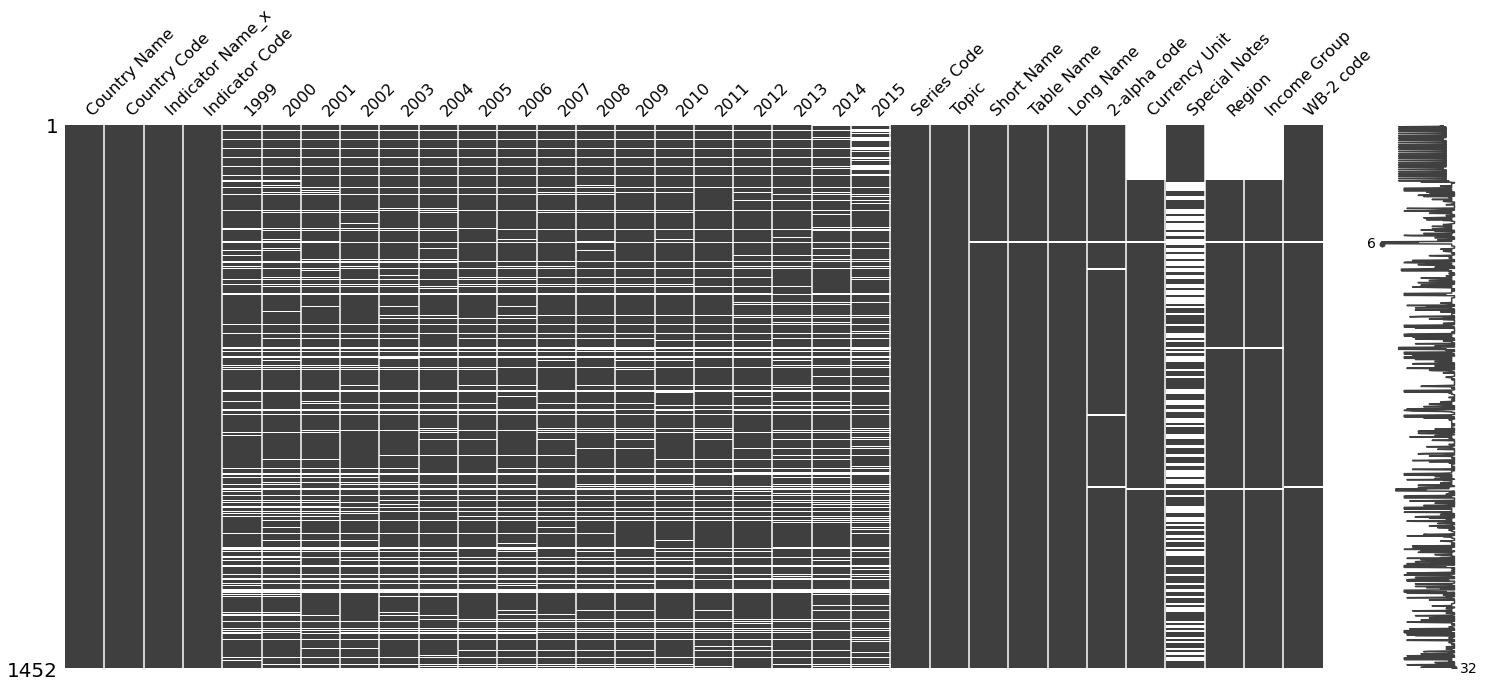

In [295]:
msno.matrix(EdStats_final)

Nous avons maintenant moins de valeurs nulles

In [296]:
# Examinons a quoi correpondent les regions non renseignees dans la 'Country Name'
pays_region_non_renseignee=EdStats_final[EdStats_final['Region'].isnull()][['Country Name','Country Code']]
pays_region_non_renseignee.head(20)

,Country Name,Country Code
1245,Arab World,ARB
1335,Arab World,ARB
1339,Arab World,ARB
1375,Arab World,ARB
2307,Arab World,ARB
2482,Arab World,ARB
4910,East Asia & Pacific,EAS
5000,East Asia & Pacific,EAS
5004,East Asia & Pacific,EAS
5040,East Asia & Pacific,EAS


In [297]:
#Dimension avant
EdStats_final.shape

(1452, 32)

In [298]:
#Ces regions non renseignees correspondent 
# a des zones dans 'Country Code'  nous supprimons ces lignes
EdStats_final=EdStats_final[~EdStats_final['Region'].isnull()]

In [299]:
# Dimension apres suppression
EdStats_final.shape

(1284, 32)

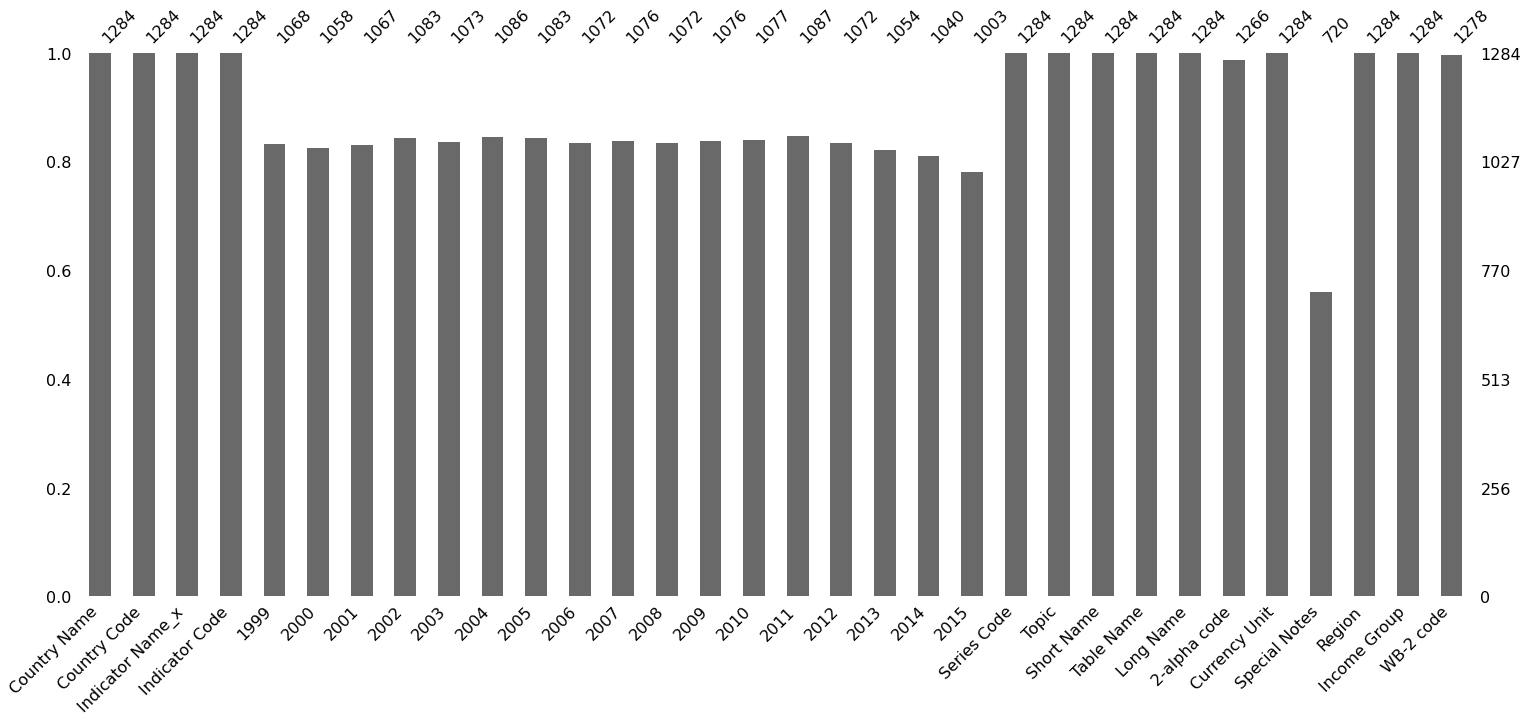

In [300]:
#  Avec le grapique à barre nous avons
msno.bar(EdStats_final)

In [301]:
EdStats_final

,Country Name,Country Code,Indicator Name_x,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Series Code,Topic,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code
92870,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,1.17e+02,1.88e+02,1.99e+02,2.19e+02,2.50e+02,2.73e+02,3.70e+02,3.73e+02,4.46e+02,5.53e+02,6.04e+02,6.69e+02,6.32e+02,6.12e+02,5.70e+02,NY.GDP.PCAP.CD,Economic Policy & Debt: National accounts: US$...,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,1.30e+01,NaN,1.33e+01,1.87e+01,1.98e+01,2.99e+01,3.01e+01,4.02e+01,4.67e+01,5.32e+01,5.46e+01,5.67e+01,5.67e+01,5.57e+01,5.56e+01,SE.SEC.ENRR,Secondary,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,1.26e+00,1.26e+00,NaN,NaN,NaN,NaN,3.90e+00,NaN,3.76e+00,NaN,NaN,8.66e+00,NaN,SE.TER.ENRR,Tertiary,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,4.72e-03,4.56e-03,8.79e-02,1.06e-01,1.22e+00,2.11e+00,1.90e+00,1.84e+00,3.55e+00,4.00e+00,5.00e+00,5.45e+00,5.90e+00,7.00e+00,8.26e+00,IT.NET.USER.P2,Infrastructure: Communications,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF
93932,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.82e+00,3.49e+00,4.25e+00,4.72e+00,4.82e+00,4.47e+00,3.87e+00,3.23e+00,2.76e+00,2.51e+00,2.57e+00,2.81e+00,3.10e+00,3.27e+00,3.32e+00,3.18e+00,2.94e+00,SP.POP.GROW,Health: Population: Dynamics,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884600,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,4.27e+01,4.26e+01,4.33e+01,4.13e+01,3.76e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.67e+01,4.76e+01,NaN,NaN,SE.SEC.ENRR,Secondary,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW
884604,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.91e+00,5.82e+00,5.87e+00,5.87e+00,NaN,8.43e+00,SE.TER.ENRR,Tertiary,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,1.62e-01,4.01e-01,8.00e-01,1.10e+00,1.80e+00,2.10e+00,2.40e+00,2.40e+00,3.00e+00,3.50e+00,4.00e+00,6.40e+00,8.40e+00,1.20e+01,1.55e+01,1.64e+01,2.27e+01,IT.NET.USER.P2,Infrastructure: Communications,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW
885572,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,1.43e+00,1.30e+00,1.17e+00,1.08e+00,1.06e+00,1.13e+00,1.26e+00,1.41e+00,1.55e+00,1.70e+00,1.84e+00,1.98e+00,2.11e+00,2.23e+00,2.31e+00,2.34e+00,2.35e+00,SP.POP.GROW,Health: Population: Dynamics,Zimbabwe,Zimbabwe,Republic of Zimbabwe,ZW,U.S. dollar,Fiscal year end: June 30; reporting period for...,Sub-Saharan Africa,Low income,ZW


In [302]:
EdStats_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 92870 to 885747
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      1284 non-null   object 
 1   Country Code      1284 non-null   object 
 2   Indicator Name_x  1284 non-null   object 
 3   Indicator Code    1284 non-null   object 
 4   1999              1068 non-null   float64
 5   2000              1058 non-null   float64
 6   2001              1067 non-null   float64
 7   2002              1083 non-null   float64
 8   2003              1073 non-null   float64
 9   2004              1086 non-null   float64
 10  2005              1083 non-null   float64
 11  2006              1072 non-null   float64
 12  2007              1076 non-null   float64
 13  2008              1072 non-null   float64
 14  2009              1076 non-null   float64
 15  2010              1077 non-null   float64
 16  2011              1087 non-null   fl

#####AUTRES VARIABLES A SUPPRIMER:

In [303]:

EdStats_final=EdStats_final.drop(['Short Name', 'Table Name', 'Long Name',
       '2-alpha code', 'Currency Unit', 'Special Notes',
      'WB-2 code'],axis=1)
EdStats_final.columns

Index(['Country Name', 'Country Code', 'Indicator Name_x', 'Indicator Code',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       'Series Code', 'Topic', 'Region', 'Income Group'],
      dtype='object')

In [304]:
# Comparons les variable 'Series Code' et 'Indicator Code'
EdStats_final[['Series Code','Indicator Code']]

,Series Code,Indicator Code
92870,NY.GDP.PCAP.CD,NY.GDP.PCAP.CD
92960,SE.SEC.ENRR,SE.SEC.ENRR
92964,SE.TER.ENRR,SE.TER.ENRR
93000,IT.NET.USER.P2,IT.NET.USER.P2
93932,SP.POP.GROW,SP.POP.GROW
...,...,...
884600,SE.SEC.ENRR,SE.SEC.ENRR
884604,SE.TER.ENRR,SE.TER.ENRR
884640,IT.NET.USER.P2,IT.NET.USER.P2
885572,SP.POP.GROW,SP.POP.GROW


In [305]:
# les 2 variables sont identiques: nous pouvons supprimer 'Serie Code'
EdStats_final=EdStats_final.drop('Series Code', axis=1)
EdStats_final.columns

Index(['Country Name', 'Country Code', 'Indicator Name_x', 'Indicator Code',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Topic',
       'Region', 'Income Group'],
      dtype='object')

In [306]:
EdStats_final.head

<bound method NDFrame.head of        Country Name Country Code  \
92870   Afghanistan          AFG   
92960   Afghanistan          AFG   
92964   Afghanistan          AFG   
93000   Afghanistan          AFG   
93932   Afghanistan          AFG   
...             ...          ...   
884600     Zimbabwe          ZWE   
884604     Zimbabwe          ZWE   
884640     Zimbabwe          ZWE   
885572     Zimbabwe          ZWE   
885747     Zimbabwe          ZWE   

                                        Indicator Name_x     Indicator Code  \
92870                       GDP per capita (current US$)     NY.GDP.PCAP.CD   
92960   Gross enrolment ratio, secondary, both sexes (%)        SE.SEC.ENRR   
92964    Gross enrolment ratio, tertiary, both sexes (%)        SE.TER.ENRR   
93000                    Internet users (per 100 people)     IT.NET.USER.P2   
93932                       Population growth (annual %)        SP.POP.GROW   
...                                                  ...       

In [307]:
EdStats_final.columns

Index(['Country Name', 'Country Code', 'Indicator Name_x', 'Indicator Code',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Topic',
       'Region', 'Income Group'],
      dtype='object')

In [364]:
# Regroupons les donnees par Indicator Code
gby=EdStats_final.groupby(['Indicator Code','Country Code'],dropna=True).count()
gby.columns

Index(['Country Name', 'Indicator Name_x', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', 'Topic', 'Region', 'Income Group',
       'Score Brut', 'COEFF', 'SCPI'],
      dtype='object')

#####SAUVEGARDE FICHIER

In [312]:
#Sauvegarde Du fichier
EdStats_final.to_csv('EdStats_final_sauv.csv',encoding='utf-8')



```
# `Ce texte est au format code`
```

####6-ANALYSE EXPLORATOIRE

    1-UNIVARIE
    
    2-BIVARIE
    
    3-MULTIVARIE
    
    4-CORRELATION

#####**ANALYSE UNIVARIEE**

###### VARIABLES NUMERIQUES Annee 2015

‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐
NY.GDP.PCAP.CD
moy:
 14829.991228734552
med:
 5636.896757038525
mod:
 0         300.68
1         348.38
2         362.66
3         362.75
4         402.09
         ...    
191     75573.48
192     81672.02
193     82016.02
194    101446.79
195    168146.02
Length: 196, dtype: float64
var:
 474381571.2356867
ect:
 21780.3023678664
skw:
 3.0092600459733876
kur:
 13.568170668214913


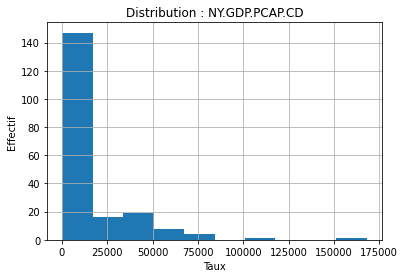

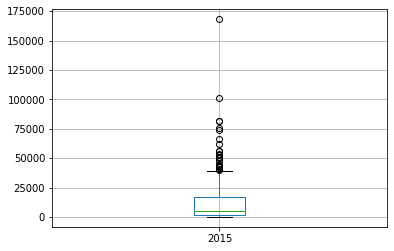

‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐
SE.SEC.ENRR
moy:
 85.81880400731013
med:
 92.0504684448242
mod:
 0        9.52
1       20.75
2       23.24
3       30.55
4       30.60
        ...  
112    130.82
113    135.47
114    140.46
115    149.46
116    166.81
Length: 117, dtype: float64
var:
 818.4112187843518
ect:
 28.607887352692646
skw:
 -0.3526966415008108
kur:
 0.22703739546692114


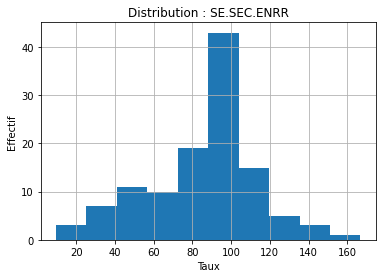

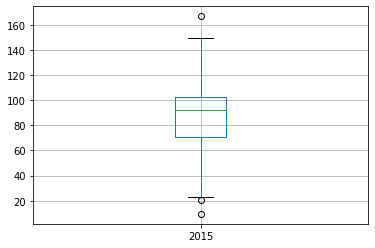

‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐
SE.TER.ENRR
moy:
 44.896015682605785
med:
 43.419528961181605
mod:
 0      5.62
1      6.39
2      7.90
3      8.43
4      8.79
      ...  
94    88.58
95    89.67
96    91.15
97    93.18
98    94.73
Length: 99, dtype: float64
var:
 650.3078955087332
ect:
 25.501135180786232
skw:
 0.2544014634846545
kur:
 -1.0979057812394923


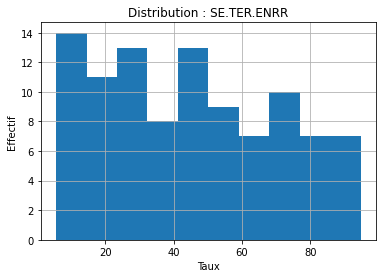

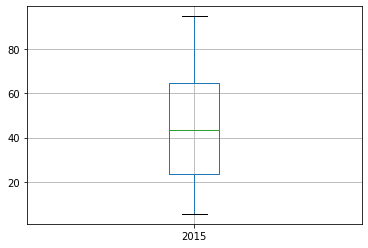

‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐
IT.NET.USER.P2
moy:
 48.785759437611915
med:
 50.3
mod:
 0    21.0
1    77.0
dtype: float64
var:
 810.5943412596068
ect:
 28.47093853843963
skw:
 0.002064958171958145
kur:
 -1.282228473754288


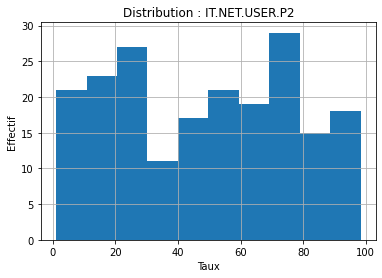

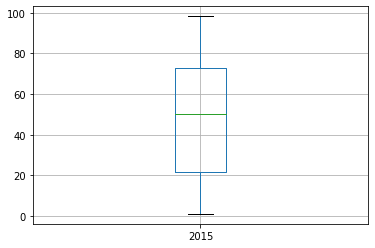

‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐
SP.POP.GROW
moy:
 1.3092855953289175
med:
 1.17082264902617
mod:
 0     -2.47
1     -1.76
2     -1.54
3     -1.10
4     -0.94
       ... 
204    3.97
205    3.99
206    4.33
207    4.41
208    5.86
Length: 209, dtype: float64
var:
 1.5072142260760883
ect:
 1.2276865341267242
skw:
 0.2530155403946939
kur:
 0.564808166881976


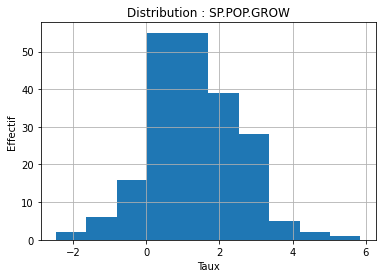

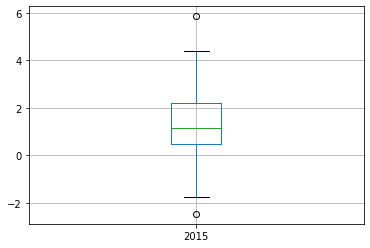

‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐‐
SP.POP.1524.TO.UN
moy:
 6654994.635359116
med:
 1331040.0
mod:
 0      1.45e+04
1      2.01e+04
2      2.30e+04
3      2.35e+04
4      2.53e+04
         ...   
176    3.91e+07
177    4.18e+07
178    4.51e+07
179    1.97e+08
180    2.44e+08
Length: 181, dtype: float64
var:
 574749698558060.9
ect:
 23973937.90260709
skw:
 8.28032303948383
kur:
 74.33754648763603


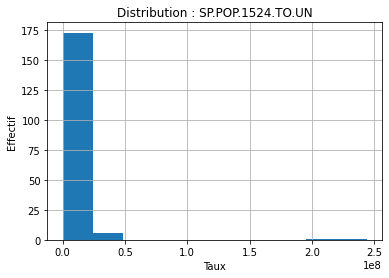

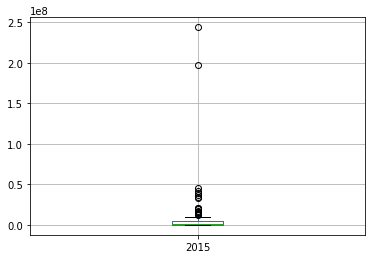

In [313]:
# Année de reference 2015
# Les mesures de forme
for ind_Code in EdStats_final["Indicator Code"].unique():
    subset = EdStats_final[EdStats_final['Indicator Code'] == ind_Code] # Création du sous‐échantillon
    print("‐"*20)
    print(ind_Code)
    print("moy:\n",subset['2015'].mean())
    print("med:\n",subset['2015'].median())
    print("mod:\n",subset['2015'].mode())
    print("var:\n",subset['2015'].var(ddof=0))
    print("ect:\n",subset['2015'].std(ddof=0))
    print("skw:\n",subset['2015'].skew())
    print("kur:\n",subset['2015'].kurtosis())
    
    subset["2015"].hist() # Crée l'histogramme
    plt.title('Distribution : '+ind_Code)
    plt.xlabel('Taux')
    plt.ylabel('Effectif')
    plt.show() # Affiche l'histogramme
    
    subset.boxplot(column="2015", vert=True) # Affiche Boxplot
    plt.show()

###### VARIABLES NUMERIQUES 1999-2015


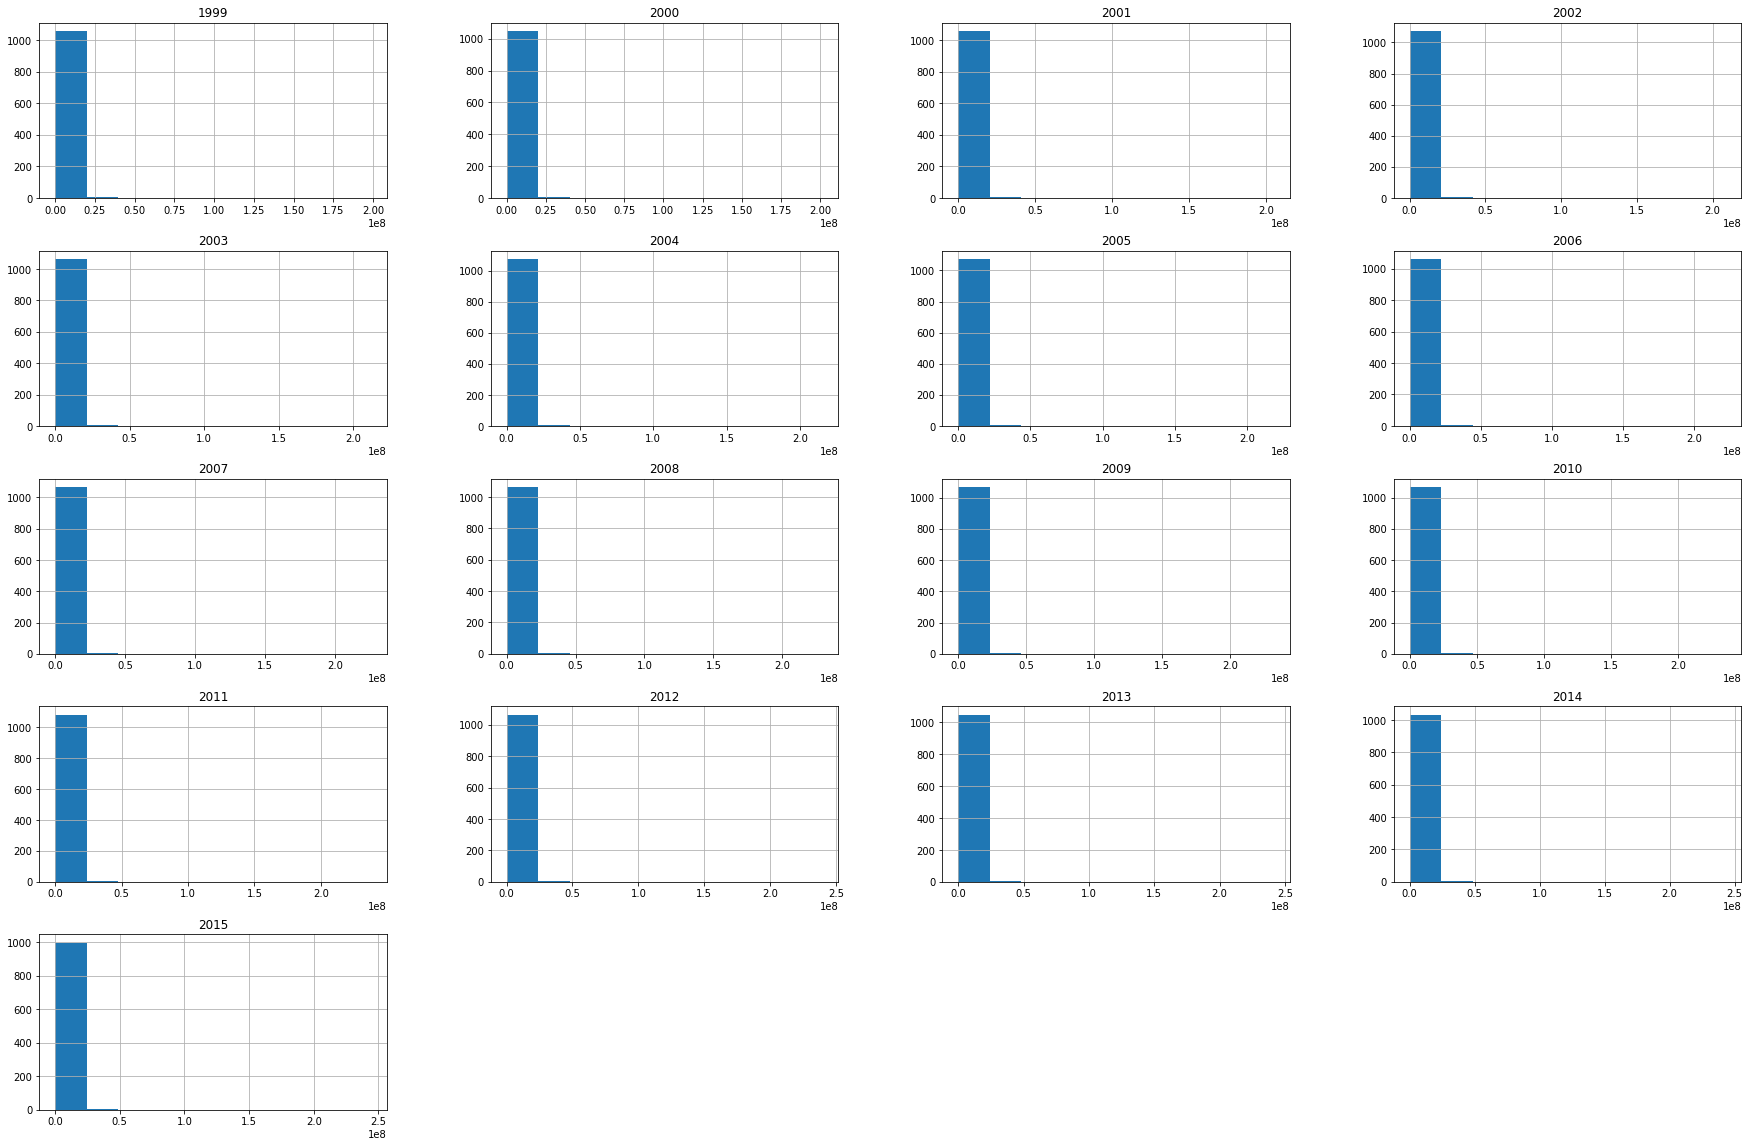

In [314]:
# Tracés correspondants a toutes les années: 1999-2015

# HISTOGRAMME SUR DONNEES NON NORMALISEES
EdStats_final.hist(figsize=(30.5,20),bins=10)
plt.show()

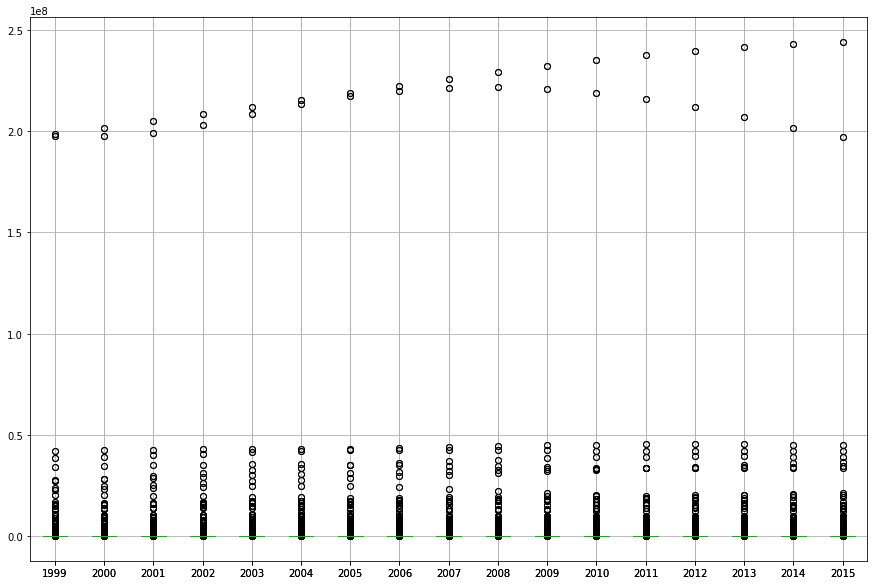

In [315]:
#BOXPLOT SUR DONNEES NON NORMALISEES
EdStats_final.boxplot(figsize=(15,10))
EdStats_final.boxplot()

###### STATISTIQUES PAR PAYS



In [316]:
EdStats_final.columns

Index(['Country Name', 'Country Code', 'Indicator Name_x', 'Indicator Code',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Topic',
       'Region', 'Income Group'],
      dtype='object')

In [317]:
EdStats_final.head()

,Country Name,Country Code,Indicator Name_x,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic,Region,Income Group
92870,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,1.17e+02,1.88e+02,198.73,219.14,250.29,272.56,369.84,373.36,445.89,553.30,603.54,669.01,631.74,612.07,569.58,Economic Policy & Debt: National accounts: US$...,South Asia,Low income
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,1.30e+01,NaN,13.32,18.66,19.78,29.93,30.08,40.22,46.73,53.25,54.62,56.68,56.69,55.66,55.64,Secondary,South Asia,Low income
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,1.26,1.26,NaN,NaN,NaN,NaN,3.90,NaN,3.76,NaN,NaN,8.66,NaN,Tertiary,South Asia,Low income
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,4.72e-03,4.56e-03,0.09,0.11,1.22,2.11,1.90,1.84,3.55,4.00,5.00,5.45,5.90,7.00,8.26,Infrastructure: Communications,South Asia,Low income
93932,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.82,3.49,4.25e+00,4.72e+00,4.82,4.47,3.87,3.23,2.76,2.51,2.57,2.81,3.10,3.27,3.32,3.18,2.94,Health: Population: Dynamics,South Asia,Low income


In [318]:
## FONCTION DE CALCUL DES STATISTIQUES
def calcul_statistiques(df):
    df['MOY']=df.mean(axis=1)
    df['MEDIAN']=df.median(axis=1)
    #df['MODE']=df.mode(axis=1)
    df['VAR']=df.var(ddof=0,axis=1)
    df['STD']=df.std(ddof=0,axis=1)
    df['SKEW']=df.skew(axis=1)
    df['KURTOSIS']=df.kurtosis(axis=1)


In [319]:
# STATISTIQUE PAR PAYS ET PAR INDICATEURS
EdStats_final_STATS_PAYS=EdStats_final.sort_values(['Country Name','Indicator Code'])
calcul_statistiques(EdStats_final_STATS_PAYS)
EdStats_final_STATS_PAYS[['Country Name', 'Indicator Code','MOY', 'MEDIAN', 'VAR', 'STD', 'SKEW',
       'KURTOSIS']].head(20)

,Country Name,Indicator Code,MOY,MEDIAN,VAR,STD,SKEW,KURTOSIS
93000,Afghanistan,IT.NET.USER.P2,3.10e+00,2.60e+00,6.16e+00,2.52e+00,0.42,-0.77
92870,Afghanistan,NY.GDP.PCAP.CD,4.05e+02,3.89e+02,2.97e+04,6.71e+03,4.07,17.90
92960,Afghanistan,SE.SEC.ENRR,3.89e+01,4.02e+01,2.48e+02,5.15e+01,3.59,14.28
92964,Afghanistan,SE.TER.ENRR,3.77e+00,3.76e+00,5.23e+00,2.19e+00,1.19,2.05
94107,Afghanistan,SP.POP.1524.TO.UN,5.43e+06,5.40e+06,1.05e+12,2.28e+11,4.28,19.73
93932,Afghanistan,SP.POP.GROW,3.42e+00,3.25e+00,4.66e-01,9.24e-01,-0.87,2.48
96665,Albania,IT.NET.USER.P2,2.53e+01,1.94e+01,5.33e+02,1.13e+02,4.10,18.62
96535,Albania,NY.GDP.PCAP.CD,3.11e+03,3.36e+03,1.44e+06,3.13e+05,4.29,19.76
96625,Albania,SE.SEC.ENRR,8.26e+01,8.19e+01,7.17e+01,8.58e+00,-2.95,5.97
96629,Albania,SE.TER.ENRR,3.42e+01,3.14e+01,2.74e+02,5.47e+01,3.90,16.93


##### CAS DE LA FRANCE

In [320]:
stats_France=EdStats_final_STATS_PAYS[['Country Name', 'Indicator Code','MOY', 'MEDIAN', 'VAR', 'STD', 'SKEW',
       'KURTOSIS']]
# stats_France.set_index('Country Name')
stats_France[stats_France['Country Name']=='France']

,Country Name,Indicator Code,MOY,MEDIAN,VAR,STD,SKEW,KURTOSIS
338555,France,IT.NET.USER.P2,5.53e+01,6.07e+01,5.70e+02,1.15e+02,4.18,18.93
338425,France,NY.GDP.PCAP.CD,3.56e+04,3.65e+04,5.38e+07,1.17e+07,4.28,19.74
338515,France,SE.SEC.ENRR,1.10e+02,1.11e+02,2.35e+00,2.42e+01,-2.95,3.57
338519,France,SE.TER.ENRR,5.65e+01,5.52e+01,8.35e+00,1.11e+01,-2.68,3.42
339662,France,SP.POP.1524.TO.UN,7.67e+06,7.68e+06,5.44e+09,1.18e+09,4.28,19.75
339487,France,SP.POP.GROW,5.98e-01,5.78e-01,1.06e-02,1.62e-01,-1.55,15.48


###### STATISTIQUES PAR REGION


In [321]:
EdStats_final_STATS_REGION=EdStats_final.groupby(by=['Region']).agg("mean")
EdStats_final_STATS_REGION.head()


,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Region,,,,,,,,,,,,,,,,,
East Asia & Pacific,2.00e+06,2.01e+06,1.97e+06,1.94e+06,2.02e+06,2.07e+06,2.12e+06,2.12e+06,2.16e+06,2.19e+06,2.14e+06,2.17e+06,2.17e+06,2.14e+06,2.16e+06,2.11e+06,2.10e+06
Europe & Central Asia,4.33e+05,4.30e+05,4.33e+05,4.35e+05,4.35e+05,4.36e+05,4.36e+05,4.26e+05,4.27e+05,4.25e+05,4.17e+05,4.07e+05,4.02e+05,3.89e+05,3.88e+05,3.76e+05,3.89e+05
Latin America & Caribbean,5.31e+05,5.34e+05,5.47e+05,5.24e+05,5.49e+05,5.23e+05,5.33e+05,5.62e+05,5.34e+05,5.34e+05,5.38e+05,5.37e+05,5.53e+05,5.61e+05,5.63e+05,5.86e+05,6.04e+05
Middle East & North Africa,5.64e+05,6.08e+05,6.08e+05,6.07e+05,6.09e+05,6.25e+05,6.29e+05,6.52e+05,6.63e+05,6.78e+05,6.79e+05,6.84e+05,6.64e+05,6.97e+05,6.80e+05,6.94e+05,6.96e+05
North America,2.85e+06,2.72e+06,2.95e+06,3.00e+06,3.05e+06,3.10e+06,2.95e+06,3.00e+06,3.24e+06,3.27e+06,3.30e+06,3.11e+06,3.12e+06,3.13e+06,3.12e+06,3.55e+06,3.82e+06


In [322]:
testt=EdStats_final_STATS_REGION
calcul_statistiques(testt)
testt

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,MOY,MEDIAN,VAR,STD,SKEW,KURTOSIS
Region,,,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,2.00e+06,2.01e+06,1.97e+06,1.94e+06,2.02e+06,2.07e+06,2.12e+06,2.12e+06,2.16e+06,2.19e+06,2.14e+06,2.17e+06,2.17e+06,2.14e+06,2.16e+06,2.11e+06,2.10e+06,2.09e+06,2.11e+06,5.00e+09,1.09e+09,4.28,19.73
Europe & Central Asia,4.33e+05,4.30e+05,4.33e+05,4.35e+05,4.35e+05,4.36e+05,4.36e+05,4.26e+05,4.27e+05,4.25e+05,4.17e+05,4.07e+05,4.02e+05,3.89e+05,3.88e+05,3.76e+05,3.89e+05,4.17e+05,4.25e+05,3.56e+08,7.74e+07,4.28,19.75
Latin America & Caribbean,5.31e+05,5.34e+05,5.47e+05,5.24e+05,5.49e+05,5.23e+05,5.33e+05,5.62e+05,5.34e+05,5.34e+05,5.38e+05,5.37e+05,5.53e+05,5.61e+05,5.63e+05,5.86e+05,6.04e+05,5.48e+05,5.42e+05,4.02e+08,8.74e+07,4.28,19.75
Middle East & North Africa,5.64e+05,6.08e+05,6.08e+05,6.07e+05,6.09e+05,6.25e+05,6.29e+05,6.52e+05,6.63e+05,6.78e+05,6.79e+05,6.84e+05,6.64e+05,6.97e+05,6.80e+05,6.94e+05,6.96e+05,6.49e+05,6.58e+05,1.36e+09,2.97e+08,4.28,19.73
North America,2.85e+06,2.72e+06,2.95e+06,3.00e+06,3.05e+06,3.10e+06,2.95e+06,3.00e+06,3.24e+06,3.27e+06,3.30e+06,3.11e+06,3.12e+06,3.13e+06,3.12e+06,3.55e+06,3.82e+06,3.13e+06,3.12e+06,5.61e+10,1.22e+10,4.28,19.73
South Asia,7.15e+06,7.31e+06,6.74e+06,7.23e+06,6.54e+06,6.99e+06,6.96e+06,7.08e+06,7.04e+06,7.15e+06,7.25e+06,7.51e+06,7.10e+06,7.49e+06,7.54e+06,7.58e+06,8.17e+06,7.22e+06,7.19e+06,1.15e+11,2.51e+10,4.28,19.73
Sub-Saharan Africa,5.25e+05,5.61e+05,5.71e+05,5.88e+05,6.23e+05,6.23e+05,6.42e+05,6.76e+05,6.93e+05,7.07e+05,7.18e+05,7.28e+05,7.10e+05,7.46e+05,7.95e+05,8.30e+05,8.82e+05,6.83e+05,6.88e+05,8.03e+09,1.75e+09,4.28,19.73


In [323]:
testt[['MOY','MEDIAN', 'VAR', 'STD', 'SKEW', 'KURTOSIS']]

,MOY,MEDIAN,VAR,STD,SKEW,KURTOSIS
Region,,,,,,
East Asia & Pacific,2.09e+06,2.11e+06,5.00e+09,1.09e+09,4.28,19.73
Europe & Central Asia,4.17e+05,4.25e+05,3.56e+08,7.74e+07,4.28,19.75
Latin America & Caribbean,5.48e+05,5.42e+05,4.02e+08,8.74e+07,4.28,19.75
Middle East & North Africa,6.49e+05,6.58e+05,1.36e+09,2.97e+08,4.28,19.73
North America,3.13e+06,3.12e+06,5.61e+10,1.22e+10,4.28,19.73
South Asia,7.22e+06,7.19e+06,1.15e+11,2.51e+10,4.28,19.73
Sub-Saharan Africa,6.83e+05,6.88e+05,8.03e+09,1.75e+09,4.28,19.73


###### VARIABLES QUALITATIVES

In [324]:
EdStats_final.columns

Index(['Country Name', 'Country Code', 'Indicator Name_x', 'Indicator Code',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Topic',
       'Region', 'Income Group'],
      dtype='object')

###### -**Variable** Region'

<function matplotlib.pyplot.show>

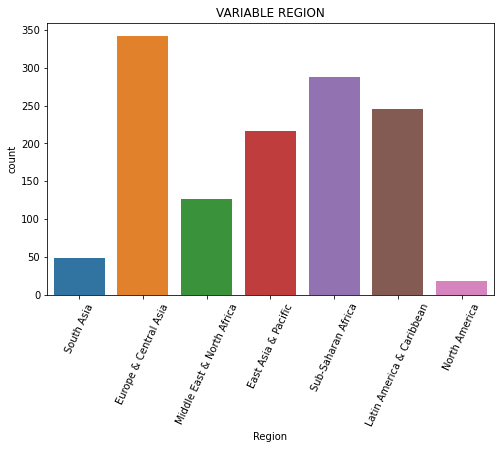

In [325]:
#Graphique Region
plt.figure(figsize=(8,5))
sns.countplot(x="Region", data=EdStats_final)
plt.title('VARIABLE REGION')
plt.xticks(rotation=65)
plt.show

###### -**Variable** Income Group'


<function matplotlib.pyplot.show>

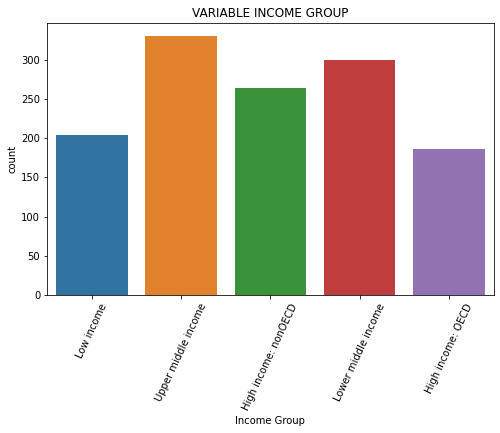

In [326]:
#Graphique Income Group
plt.figure(figsize=(8,5))
sns.countplot(x="Income Group", data=EdStats_final)
plt.title('VARIABLE INCOME GROUP')
plt.xticks(rotation=65)
plt.show

###### -**Variable** Topic'

<function matplotlib.pyplot.show>

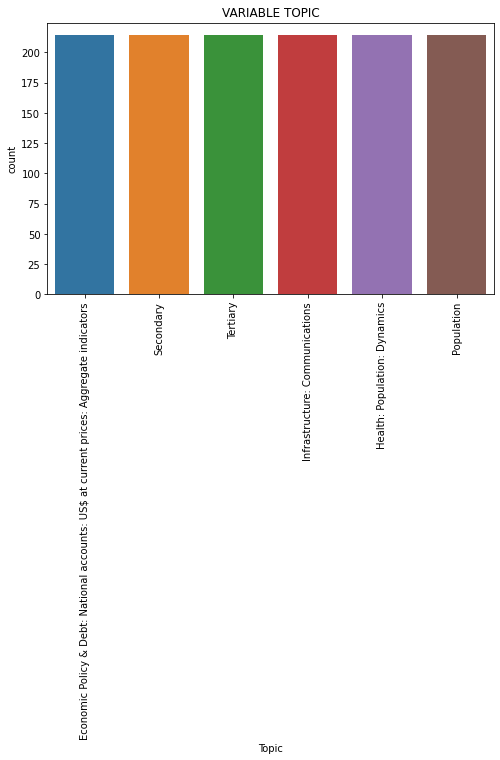

In [327]:
#Graphique Topic
plt.figure(figsize=(8,5))
sns.countplot(x="Topic", data=EdStats_final)
plt.title('VARIABLE TOPIC')
plt.xticks(rotation=90)
plt.show

###### -**Variable** Country Name'

<function matplotlib.pyplot.show>

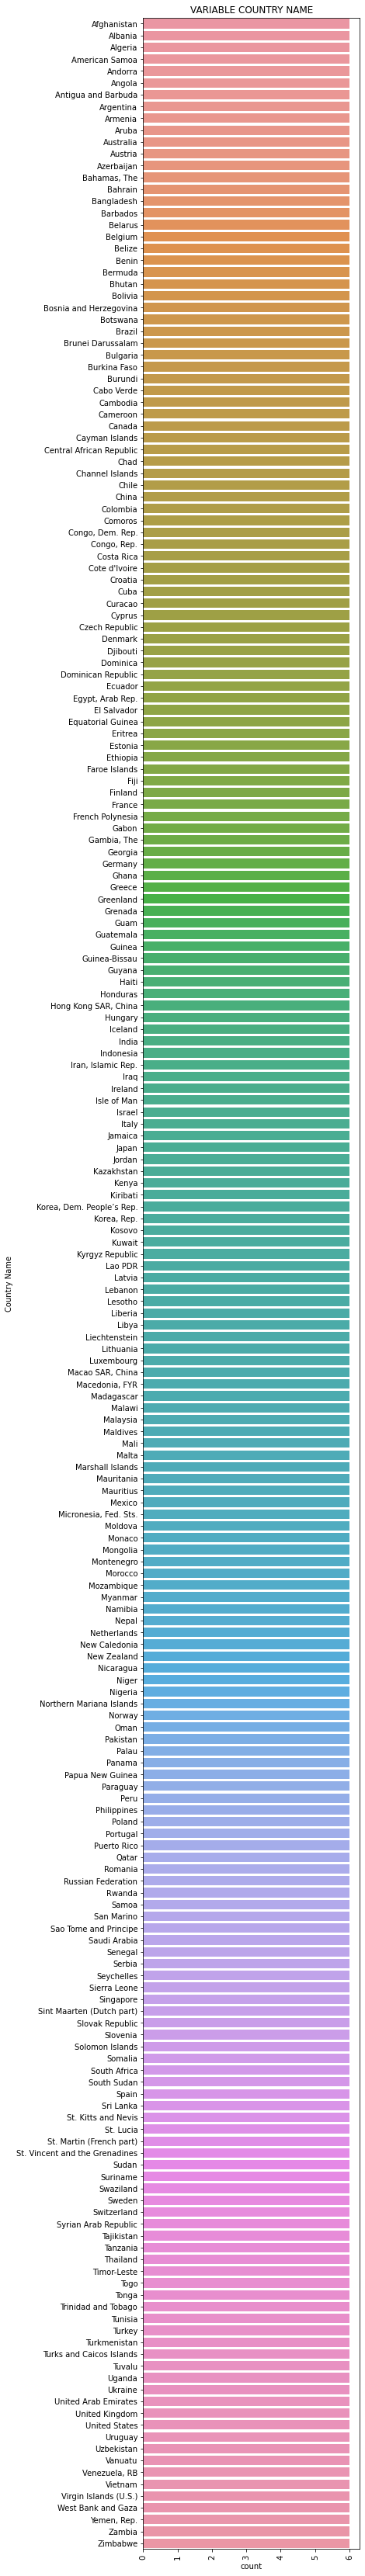

In [328]:
#Graphique Topic
plt.figure(figsize=(5,60))
sns.countplot(y="Country Name", data=EdStats_final)
plt.title('VARIABLE COUNTRY NAME')
plt.xticks(rotation=90)
plt.show

###### -**Variable** Country Code'

<function matplotlib.pyplot.show>

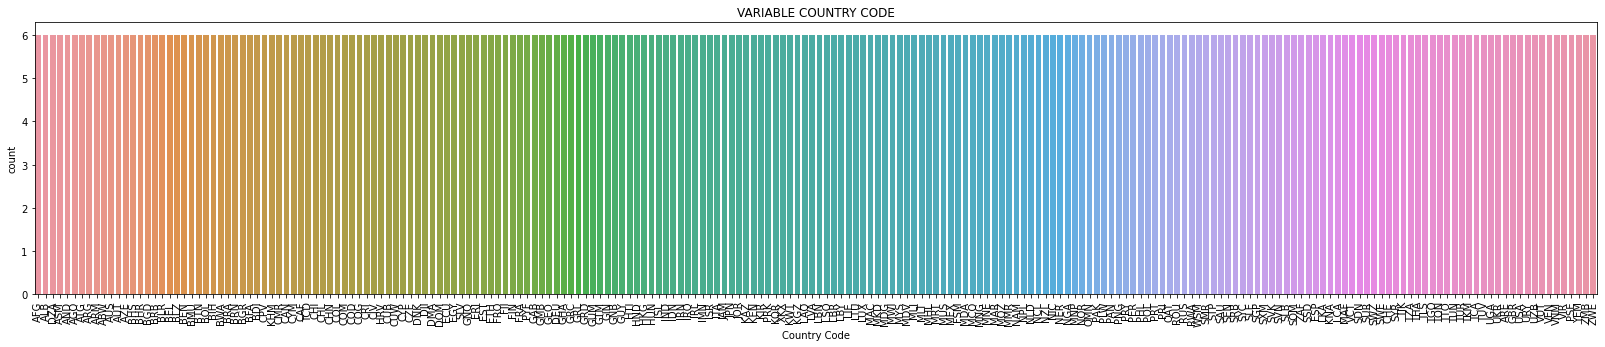

In [329]:
#Graphique Topic
plt.figure(figsize=(28,5))
sns.countplot(x="Country Code",data=EdStats_final)
plt.title('VARIABLE COUNTRY CODE')
plt.xticks(rotation=90)
plt.show

###### -**Variable** Indicator Name'

###### -**Variable** Indicator Code'

<function matplotlib.pyplot.show>

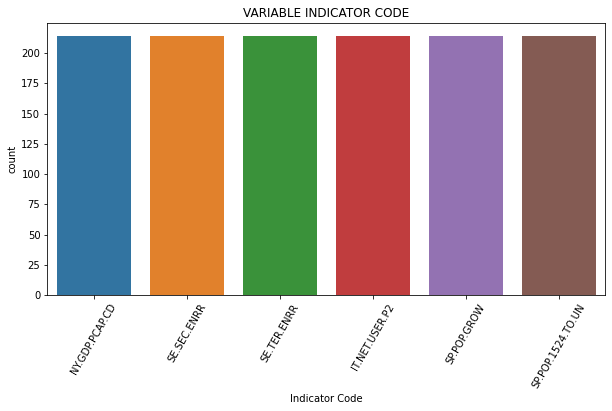

In [330]:
#Graphique Topic
plt.figure(figsize=(10,5))
sns.countplot(x="Indicator Code", data=EdStats_final)
plt.title('VARIABLE INDICATOR CODE')
plt.xticks(rotation=60)
plt.show

##### ANALYSE BIVARIEE



##### ANALYSE MULTIVARIEE

In [331]:
EdStats_final.describe()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,1.07e+03,1.06e+03,1.07e+03,1.08e+03,1.07e+03,1.09e+03,1.08e+03,1.07e+03,1.08e+03,1.07e+03,1.08e+03,1.08e+03,1.09e+03,1.07e+03,1.05e+03,1.04e+03,1.00e+03
mean,9.98e+05,1.02e+06,1.03e+06,1.03e+06,1.06e+06,1.06e+06,1.08e+06,1.10e+06,1.11e+06,1.12e+06,1.12e+06,1.13e+06,1.12e+06,1.13e+06,1.15e+06,1.16e+06,1.20e+06
std,9.08e+06,9.20e+06,9.28e+06,9.38e+06,9.61e+06,9.74e+06,9.91e+06,1.01e+07,1.02e+07,1.03e+07,1.03e+07,1.03e+07,1.03e+07,1.03e+07,1.04e+07,1.04e+07,1.05e+07
min,-1.10e+01,-4.08e+00,-3.77e+00,-2.17e+00,-1.97e+00,-2.64e+00,-2.97e+00,-3.28e+00,-3.59e+00,-3.56e+00,-3.33e+00,-3.33e+00,-2.63e+00,-2.15e+00,-3.04e+00,-3.11e+00,-2.47e+00
25%,1.95e+00,2.21e+00,2.48e+00,2.70e+00,2.90e+00,3.17e+00,3.37e+00,3.75e+00,4.25e+00,5.16e+00,5.56e+00,6.40e+00,7.38e+00,8.26e+00,1.00e+01,1.19e+01,1.41e+01
50%,3.99e+01,4.65e+01,4.91e+01,5.34e+01,5.95e+01,6.19e+01,6.38e+01,6.59e+01,6.63e+01,6.72e+01,6.99e+01,7.10e+01,7.05e+01,7.22e+01,7.58e+01,7.91e+01,7.94e+01
75%,3.63e+03,4.07e+03,3.85e+03,4.01e+03,4.46e+03,4.86e+03,5.33e+03,5.84e+03,6.03e+03,7.01e+03,6.89e+03,7.36e+03,7.38e+03,7.56e+03,8.66e+03,9.60e+03,1.06e+04
max,1.99e+08,2.01e+08,2.05e+08,2.08e+08,2.12e+08,2.15e+08,2.19e+08,2.22e+08,2.26e+08,2.29e+08,2.32e+08,2.35e+08,2.38e+08,2.40e+08,2.42e+08,2.43e+08,2.44e+08


In [332]:
#### B-VARIABLES QUALITATIVES
#      BARPLOT
EdStats_final.describe(include=[object]).T

,count,unique,top,freq
Country Name,1284,214,Paraguay,6
Country Code,1284,214,OMN,6
Indicator Name_x,1284,6,"Population, ages 15-24, total",214
Indicator Code,1284,6,SE.TER.ENRR,214
Topic,1284,6,Health: Population: Dynamics,214
Region,1284,7,Europe & Central Asia,342
Income Group,1284,5,Upper middle income,330


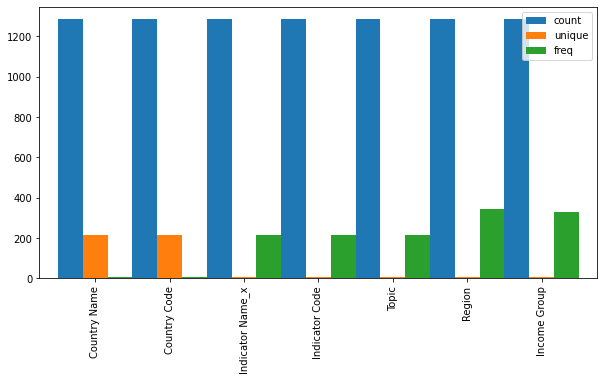

In [333]:
#PLOT graphique correspondant
EdStats_final.describe(include=[object]).T.plot(kind='bar',figsize=(10,5),width=1.0)

##### CORRELATION DONNEES NON NORMALISEES

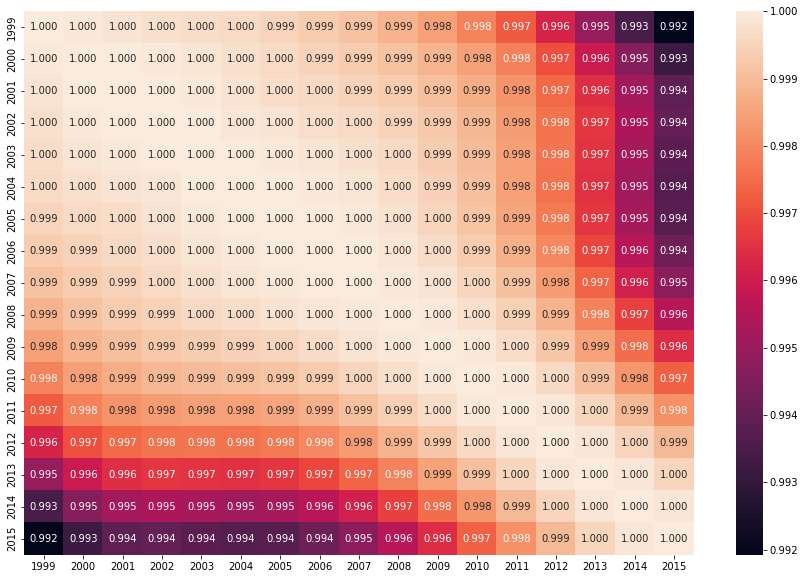

In [334]:
# CORRELATION DONNEES NON NORMALISEES
plt.figure(figsize=(15,10))
corelation=EdStats_final.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True, fmt='.3f')
plt.show()  

Donnees tres correlees mais nous retenons l ensemble des annees.

##### TRAITEMENT DONNEES MANQUANTES IMPUTATION

Nous allons considerer toutes les annee de 1999 à 2015 et allons proceder à une imputation : 

In [335]:
# TRAITEMENT  DES VALEURS MANQUANTES PAR IMPUTATION
liste=['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'] 

EdStats_final_interpolated=EdStats_final           
EdStats_final_interpolated[liste]=EdStats_final_interpolated[liste].interpolate(method='linear', axis=1)

In [336]:
EdStats_final_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 92870 to 885747
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country Name      1284 non-null   object 
 1   Country Code      1284 non-null   object 
 2   Indicator Name_x  1284 non-null   object 
 3   Indicator Code    1284 non-null   object 
 4   1999              1068 non-null   float64
 5   2000              1092 non-null   float64
 6   2001              1114 non-null   float64
 7   2002              1131 non-null   float64
 8   2003              1145 non-null   float64
 9   2004              1154 non-null   float64
 10  2005              1159 non-null   float64
 11  2006              1164 non-null   float64
 12  2007              1167 non-null   float64
 13  2008              1172 non-null   float64
 14  2009              1179 non-null   float64
 15  2010              1184 non-null   float64
 16  2011              1186 non-null   fl

In [337]:
EdStats_final_interpolated.head(5)

,Country Name,Country Code,Indicator Name_x,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic,Region,Income Group
92870,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,1.17e+02,1.88e+02,198.73,219.14,250.29,272.56,369.84,373.36,445.89,553.30,603.54,669.01,631.74,612.07,569.58,Economic Policy & Debt: National accounts: US$...,South Asia,Low income
92960,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,NaN,1.30e+01,1.32e+01,13.32,18.66,19.78,29.93,30.08,40.22,46.73,53.25,54.62,56.68,56.69,55.66,55.64,Secondary,South Asia,Low income
92964,Afghanistan,AFG,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,1.26,1.26,1.79,2.31,2.84,3.37,3.90,3.83,3.76,5.39,7.03,8.66,8.66,Tertiary,South Asia,Low income
93000,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,4.72e-03,4.56e-03,0.09,0.11,1.22,2.11,1.90,1.84,3.55,4.00,5.00,5.45,5.90,7.00,8.26,Infrastructure: Communications,South Asia,Low income
93932,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,2.82,3.49,4.25e+00,4.72e+00,4.82,4.47,3.87,3.23,2.76,2.51,2.57,2.81,3.10,3.27,3.32,3.18,2.94,Health: Population: Dynamics,South Asia,Low income


In [338]:
EdStats_final_interpolated.tail()

,Country Name,Country Code,Indicator Name_x,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic,Region,Income Group
884600,Zimbabwe,ZWE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,4.27e+01,4.26e+01,4.33e+01,4.13e+01,3.76e+01,3.86e+01,3.96e+01,4.06e+01,4.16e+01,4.26e+01,4.37e+01,4.47e+01,4.57e+01,4.67e+01,4.76e+01,4.76e+01,4.76e+01,Secondary,Sub-Saharan Africa,Low income
884604,Zimbabwe,ZWE,"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.91e+00,5.82e+00,5.87e+00,5.87e+00,7.15e+00,8.43e+00,Tertiary,Sub-Saharan Africa,Low income
884640,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,1.62e-01,4.01e-01,8.00e-01,1.10e+00,1.80e+00,2.10e+00,2.40e+00,2.40e+00,3.00e+00,3.50e+00,4.00e+00,6.40e+00,8.40e+00,1.20e+01,1.55e+01,1.64e+01,2.27e+01,Infrastructure: Communications,Sub-Saharan Africa,Low income
885572,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,1.43e+00,1.30e+00,1.17e+00,1.08e+00,1.06e+00,1.13e+00,1.26e+00,1.41e+00,1.55e+00,1.70e+00,1.84e+00,1.98e+00,2.11e+00,2.23e+00,2.31e+00,2.34e+00,2.35e+00,Health: Population: Dynamics,Sub-Saharan Africa,Low income
885747,Zimbabwe,ZWE,"Population, ages 15-24, total",SP.POP.1524.TO.UN,2.84e+06,2.92e+06,3.00e+06,3.08e+06,3.15e+06,3.21e+06,3.27e+06,3.31e+06,3.34e+06,3.37e+06,3.38e+06,3.39e+06,3.39e+06,3.38e+06,3.37e+06,3.35e+06,3.33e+06,Population,Sub-Saharan Africa,Low income


REMARQUES: l'imputation n est pas complete



In [339]:
# SCORING ET RECOMMANDATIONS
# Graphique evolution  et calcul du score



In [340]:
# EdStats_final_interpolated.columns

In [341]:
# EdStats_final_interpolated.isnull().sum()

In [342]:
# EdStats_final_interpolated['1999'] = EdStats_final_interpolated['1999'].fillna((EdStats_final_interpolated['1999'].mean()))

In [343]:
#
# EdStats_final_interpolated.isnull().sum()


NOUS AVONS ENCORE QUELQUES VALEURS MANQUANTES  DAND LE JEU DE DONNEES




###### GRAPHIQUE EVOLUTION DES INDICATEURS



In [344]:
#TRACE EVOLUTION DESINDICATEURS
grouped=EdStats_final.groupby(['Indicator Code','Region']).mean()
grouped

1999      2000      2001  \
Indicator Code    Region                                                     
IT.NET.USER.P2    East Asia & Pacific         7.55e+00  1.07e+01  1.36e+01   
                  Europe & Central Asia       1.20e+01  1.71e+01  2.08e+01   
                  Latin America & Caribbean   2.96e+00  5.18e+00  7.38e+00   
                  Middle East & North Africa  3.35e+00  4.95e+00  5.96e+00   
                  North America               3.73e+01  4.58e+01  5.23e+01   
                  South Asia                  3.02e-01  6.77e-01  9.54e-01   
                  Sub-Saharan Africa          4.87e-01  8.50e-01  1.15e+00   
NY.GDP.PCAP.CD    East Asia & Pacific         7.37e+03  7.20e+03  6.82e+03   
                  Europe & Central Asia       1.69e+04  1.55e+04  1.56e+04   
                  Latin America & Caribbean   5.05e+03  5.33e+03  5.38e+03   
                  Middle East & North Africa  7.33e+03  8.57e+03  8.15e+03   
                  North America               3.70e+04  3.90e+04  3.99e+04   
                  South Asia                  7.45e+02  7.76e+02  7.94e+02   
                  Sub-Saharan Africa          8.93e+02  9.15e+02  8.86e+02   
SE.SEC.ENRR       East Asia & Pacific         7.04e+01  7.16e+01  7.12e+01   
                  Europe & Central Asia       9.69e+01  9.77e+01  9.91e+01   
                  Latin America & Caribbean   7.33e+01  7.68e+01  7.86e+01   
                  Middle East & North Africa  7.02e+01  7.18e+01  7.28e+01   
                  North America               9.80e+01  9.73e+01  9.15e+01   
                  South Asia                  3.83e+01  4.22e+01  4.03e+01   
                  Sub-Saharan Africa          3.17e+01  3.30e+01  3.24e+01   
SE.TER.ENRR       East Asia & Pacific         2.49e+01  2.45e+01  2.61e+01   
                  Europe & Central Asia       4.08e+01  4.25e+01  4.41e+01   
                  Latin America & Caribbean   2.54e+01  2.71e+01  2.77e+01   
                  Middle East & North Africa  2.29e+01  2.33e+01  2.47e+01   
                  North America               6.61e+01  6.35e+01  6.39e+01   
                  South Asia                  4.10e+00  5.57e+00  6.03e+00   
                  Sub-Saharan Africa          3.11e+00  3.53e+00  3.95e+00   
SP.POP.1524.TO.UN East Asia & Pacific         1.11e+07  1.11e+07  1.12e+07   
                  Europe & Central Asia       2.69e+06  2.70e+06  2.71e+06   
                  Latin America & Caribbean   2.93e+06  2.96e+06  2.90e+06   
                  Middle East & North Africa  3.11e+06  3.20e+06  3.29e+06   
                  North America               2.14e+07  1.45e+07  1.47e+07   
                  South Asia                  3.31e+07  3.38e+07  3.45e+07   
                  Sub-Saharan Africa          2.80e+06  2.89e+06  2.98e+06   
SP.POP.GROW       East Asia & Pacific         1.33e+00  1.31e+00  1.30e+00   
                  Europe & Central Asia       1.37e-01  2.30e-01  3.21e-01   
                  Latin America & Caribbean   1.17e+00  1.11e+00  1.22e+00   
                  Middle East & North Africa  2.37e+00  2.40e+00  2.39e+00   
                  North America               8.46e-01  9.63e-01  1.03e+00   
                  South Asia                  2.20e+00  2.12e+00  2.18e+00   
                  Sub-Saharan Africa          2.73e+00  2.64e+00  2.55e+00   

                                                  2002      2003      2004  \
Indicator Code    Region                                                     
IT.NET.USER.P2    East Asia & Pacific         1.54e+01  1.72e+01  1.99e+01   
                  Europe & Central Asia       2.78e+01  3.21e+01  3.60e+01   
                  Latin America & Caribbean   1.08e+01  1.31e+01  1.52e+01   
                  Middle East & North Africa  7.87e+00  1.00e+01  1.19e+01   
                  North America               5.75e+01  6.08e+01  6.39e+01   
                  South Asia                  1.58e+00  2.15e+00  2.51e

In [345]:
grouped_T=grouped.T
grouped_T

Indicator Code      IT.NET.USER.P2                        \
Region         East Asia & Pacific Europe & Central Asia   
1999                          7.55                 12.02   
2000                         10.73                 17.08   
2001                         13.58                 20.79   
2002                         15.35                 27.76   
2003                         17.23                 32.13   
2004                         19.91                 36.02   
2005                         21.44                 39.22   
2006                         23.42                 42.98   
2007                         25.28                 47.00   
2008                         26.58                 50.51   
2009                         28.63                 54.26   
2010                         31.21                 58.00   
2011                         33.81                 60.70   
2012                         36.39                 64.27   
2013                         39.03                 67.47   
2014                         42.02                 69.81   
2015                         45.34                 72.06   

Indicator Code                                                       \
Region         Latin America & Caribbean Middle East & North Africa   
1999                                2.96                       3.35   
2000                                5.18                       4.95   
2001                                7.38                       5.96   
2002                               10.85                       7.87   
2003                               13.11                      10.04   
2004                               15.22                      11.87   
2005                               18.06                      14.32   
2006                               20.78                      17.12   
2007                               23.65                      22.13   
2008                               27.80                      27.17   
2009                               31.65                      31.41   
2010                               35.34                      36.37   
2011                               39.36                      40.87   
2012                               43.08                      44.95   
2013                               45.83                      48.88   
2014                               49.37                      52.62   
2015                               53.10                      55.45   

Indicator Code                                              \
Region         North America South Asia Sub-Saharan Africa   
1999                   37.33       0.30               0.49   
2000                   45.78       0.68               0.85   
2001                   52.26       0.95               1.15   
2002                   57.47       1.58               1.48   
2003                   60.81       2.15               1.86   
2004                   63.90       2.51               2.50   
2005                   68.36       2.94               2.86   
2006                   70.41       3.96               3.53   
2007                   74.18       5.25               4.17   
2008                   77.67       6.62               5.00   
2009                   78.18       7.75               5.80   
2010                   78.73      10.41               7.48   
2011                   80.36      12.62               8.95   
2012                   83.00      14.62              10.63   
2013                   84.17      17.53              12.88   
2014                   85.64      21.84              15.30   
2015                   87.12      25.56              18.19   

Indicator Code      NY.GDP.PCAP.CD                        \
Region         East Asia & Pacific Europe & Central Asia   
1999                       7365.87              16941.36   
2000                       7195.63              15516.59   
2001                       6820.48              15643.77   
2002                       780

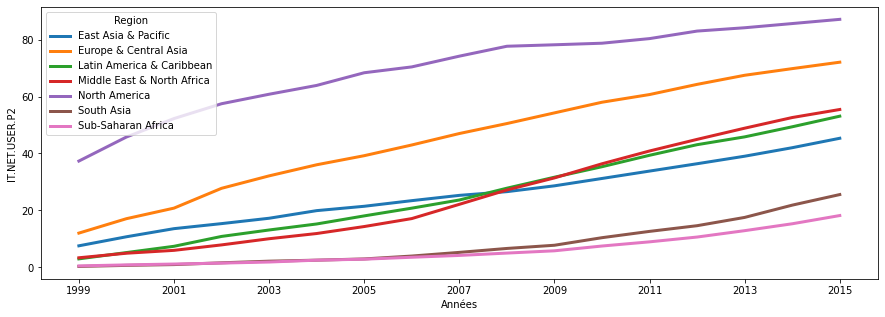

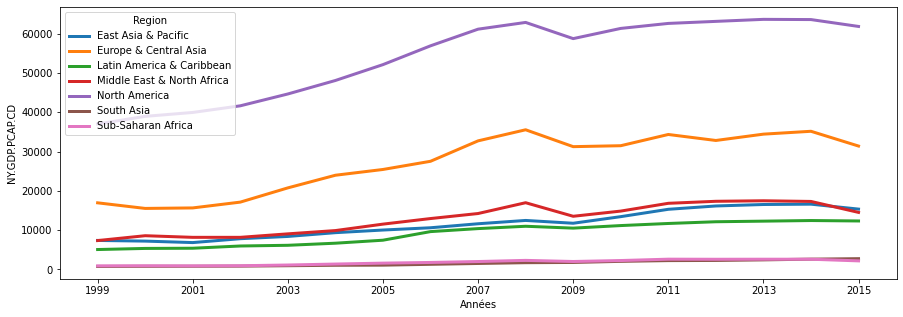

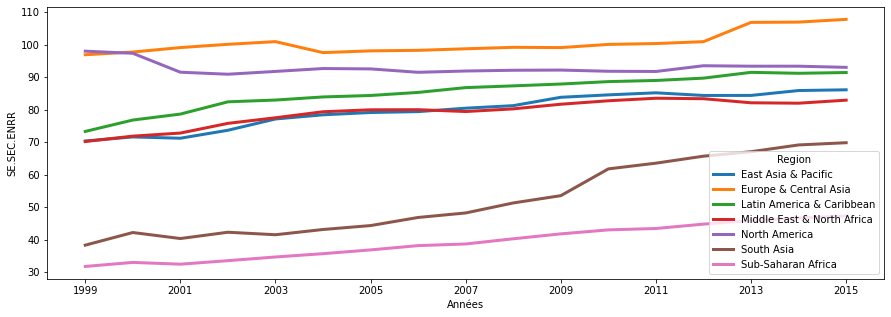

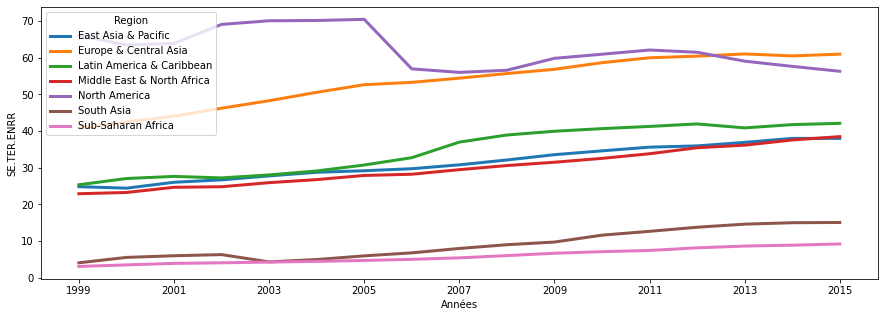

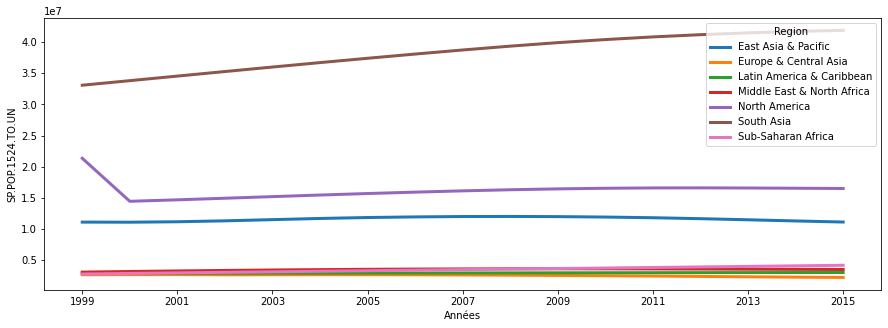

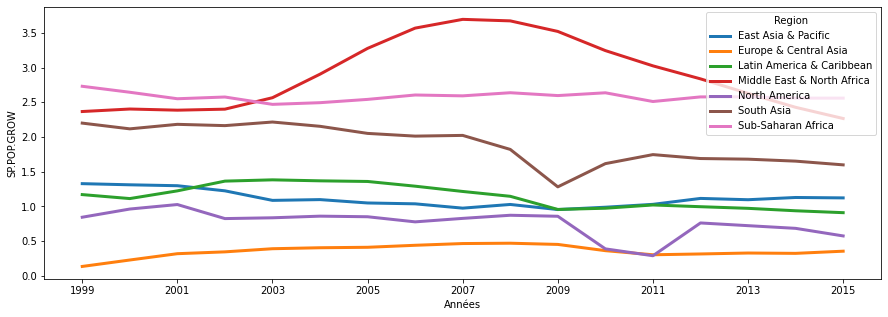

In [346]:
# Tracé evolution des indicateurs données brutes
k='No'
for  ind, reg in grouped_T:
    #print(ind,reg)
    if k != ind:
        grouped_T[ind].plot(kind='line',xlabel='Années',ylabel=ind,figsize=(15,5),subplots=False,linewidth=3)
        k=ind


####**7-DETERMINATION DU SCORING/ RECOMMANDATION**



In [347]:
##### INDICATEURS AVEC LEUR PONDERATION 3 3 5 10 6 6 

coeff_ind={
    'SE.SEC.ENRR':3,   
    'SE.TER.ENRR':3, 
    'NY.GDP.PCAP.CD':5, 
    'IT.NET.USER.P2':8,
    'SP.POP.GROW':4 ,
    'SP.POP.1524.TO.UN':8 
}

In [348]:
# Traçons le graphique correspondant
# plt.figure(figsize=(15,10))
# plt.plot(score_first_10['pourcentage'])
# degrees = 45
# plt.xticks(rotation=degrees)

###### CALCUL DU SCORE FINAL PAR PAYS ET PAR INDICATEUR AVANT APPLICATION COEFFICIENT

In [349]:
#####  TEST TEST TEST
df=EdStats_final_interpolated
df['Score Brut'] = df.sum(axis=1) / df.max(axis=1)
df.sort_values(by='Score Brut',ascending=False).head(10)

,Country Name,Country Code,Indicator Name_x,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic,Region,Income Group,Score Brut
566717,Moldova,MDA,Population growth (annual %),SP.POP.GROW,-0.16,-0.20,-0.22,-0.23,-0.28,-0.25,-0.24,-0.28,-0.23,-0.19,-0.13,-0.10,-0.06,-0.01,-0.03,-0.06,-0.06,Health: Population: Dynamics,Europe & Central Asia,Lower middle income,208.64
676667,Romania,ROU,Population growth (annual %),SP.POP.GROW,-0.16,-0.13,-1.40,-1.83,-0.72,-0.57,-0.62,-0.59,-1.48,-1.67,-0.83,-0.59,-0.49,-0.45,-0.37,-0.37,-0.47,Health: Population: Dynamics,Europe & Central Asia,Upper middle income,98.41
354147,Georgia,GEO,Population growth (annual %),SP.POP.GROW,-0.78,-0.77,-0.72,-0.67,-1.30,-1.30,-1.30,-1.30,-1.31,-1.28,-1.30,-1.32,-1.31,-1.30,-1.29,-1.31,-0.27,Health: Population: Dynamics,Europe & Central Asia,Lower middle income,70.80
705987,Serbia,SRB,Population growth (annual %),SP.POP.GROW,-0.36,-0.32,-0.17,-0.09,-0.21,-0.23,-0.30,-0.39,-0.41,-0.43,-0.40,-0.40,-0.79,-0.49,-0.49,-0.47,-0.49,Health: Population: Dynamics,Europe & Central Asia,Upper middle income,69.94
97597,Albania,ALB,Population growth (annual %),SP.POP.GROW,-0.63,-0.64,-0.94,-0.30,-0.37,-0.42,-0.51,-0.63,-0.76,-0.77,-0.67,-0.50,-0.27,-0.17,-0.18,-0.21,-0.29,Health: Population: Dynamics,Europe & Central Asia,Upper middle income,49.97
837927,Ukraine,UKR,Population growth (annual %),SP.POP.GROW,-0.94,-1.01,-1.01,-0.99,-0.81,-0.76,-0.73,-0.68,-0.60,-0.54,-0.44,-0.40,-0.36,-0.25,-0.23,-0.48,-0.26,Health: Population: Dynamics,Europe & Central Asia,Lower middle income,46.03
511742,Lithuania,LTU,Population growth (annual %),SP.POP.GROW,-0.71,-0.70,-0.82,-0.80,-0.81,-1.12,-1.63,-1.60,-1.19,-1.03,-1.11,-2.10,-2.26,-1.34,-1.01,-0.86,-0.94,Health: Population: Dynamics,Europe & Central Asia,High income: nonOECD,28.48
200217,Bulgaria,BGR,Population growth (annual %),SP.POP.GROW,-0.56,-0.49,-1.99,-2.17,-0.79,-0.75,-0.75,-0.76,-0.74,-0.70,-0.64,-0.66,-0.64,-0.58,-0.56,-0.57,-0.64,Health: Population: Dynamics,Europe & Central Asia,Upper middle income,28.35
409122,Hungary,HUN,Population growth (annual %),SP.POP.GROW,-0.28,-0.26,-0.23,-0.28,-0.29,-0.22,-0.20,-0.16,-0.15,-0.18,-0.15,-0.23,-0.28,-0.52,-0.28,-0.27,-0.24,Health: Population: Dynamics,Europe & Central Asia,Upper middle income,27.20
489752,Latvia,LVA,Population growth (annual %),SP.POP.GROW,-0.81,-0.96,-1.29,-1.16,-0.97,-1.09,-1.08,-0.92,-0.82,-1.05,-1.65,-2.08,-1.82,-1.24,-1.07,-0.94,-0.82,Health: Population: Dynamics,Europe & Central Asia,High income: nonOECD,24.30


#### CALCUL SCORE FINAL PAR PAYS ET PAR INDICATEUR

In [350]:
# Calcul SCPI: Score final/pays/indicateur

df['COEFF']=df['Indicator Code'].map(coeff_ind)
df['SCPI']=df['COEFF']*df['Score Brut']
df.sort_values(by='SCPI',ascending=False).head(5)

,Country Name,Country Code,Indicator Name_x,Indicator Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Topic,Region,Income Group,Score Brut,COEFF,SCPI
566717,Moldova,MDA,Population growth (annual %),SP.POP.GROW,-0.16,-0.20,-0.22,-0.23,-0.28,-0.25,-0.24,-0.28,-0.23,-0.19,-0.13,-0.10,-0.06,-0.01,-0.03,-0.06,-0.06,Health: Population: Dynamics,Europe & Central Asia,Lower middle income,208.64,4,834.56
676667,Romania,ROU,Population growth (annual %),SP.POP.GROW,-0.16,-0.13,-1.40,-1.83,-0.72,-0.57,-0.62,-0.59,-1.48,-1.67,-0.83,-0.59,-0.49,-0.45,-0.37,-0.37,-0.47,Health: Population: Dynamics,Europe & Central Asia,Upper middle income,98.41,4,393.63
354147,Georgia,GEO,Population growth (annual %),SP.POP.GROW,-0.78,-0.77,-0.72,-0.67,-1.30,-1.30,-1.30,-1.30,-1.31,-1.28,-1.30,-1.32,-1.31,-1.30,-1.29,-1.31,-0.27,Health: Population: Dynamics,Europe & Central Asia,Lower middle income,70.80,4,283.19
705987,Serbia,SRB,Population growth (annual %),SP.POP.GROW,-0.36,-0.32,-0.17,-0.09,-0.21,-0.23,-0.30,-0.39,-0.41,-0.43,-0.40,-0.40,-0.79,-0.49,-0.49,-0.47,-0.49,Health: Population: Dynamics,Europe & Central Asia,Upper middle income,69.94,4,279.77
97597,Albania,ALB,Population growth (annual %),SP.POP.GROW,-0.63,-0.64,-0.94,-0.30,-0.37,-0.42,-0.51,-0.63,-0.76,-0.77,-0.67,-0.50,-0.27,-0.17,-0.18,-0.21,-0.29,Health: Population: Dynamics,Europe & Central Asia,Upper middle income,49.97,4,199.89


##### CALCUL  SCORE FINAL PAR PAYS



In [351]:
df_gby_pays=df.groupby(['Country Code','Country Name'])['SCPI'].sum().sort_values(ascending=False).head(50)
df_gby_pays.reset_index

<bound method Series.reset_index of Country Code  Country Name        
MDA           Moldova                 1145.65
ROU           Romania                  708.60
GEO           Georgia                  589.21
ALB           Albania                  512.34
UKR           Ukraine                  489.91
SRB           Serbia                   481.06
LTU           Lithuania                464.63
USA           United States            462.50
CAN           Canada                   460.62
HUN           Hungary                  452.88
FIN           Finland                  448.45
NOR           Norway                   443.81
GBR           United Kingdom           443.12
LVA           Latvia                   442.53
BGR           Bulgaria                 440.77
CHE           Switzerland              440.48
FRA           France                   438.55
BRB           Barbados                 438.13
NLD           Netherlands              437.07
KOR           Korea, Rep.              432.28
DNK      

In [352]:
df1=pd.DataFrame(df_gby_pays)
df1.head(10)

,,SCPI
Country Code,Country Name,
MDA,Moldova,1145.65
ROU,Romania,708.60
GEO,Georgia,589.21
ALB,Albania,512.34
UKR,Ukraine,489.91
SRB,Serbia,481.06
LTU,Lithuania,464.63
USA,United States,462.50
CAN,Canada,460.62


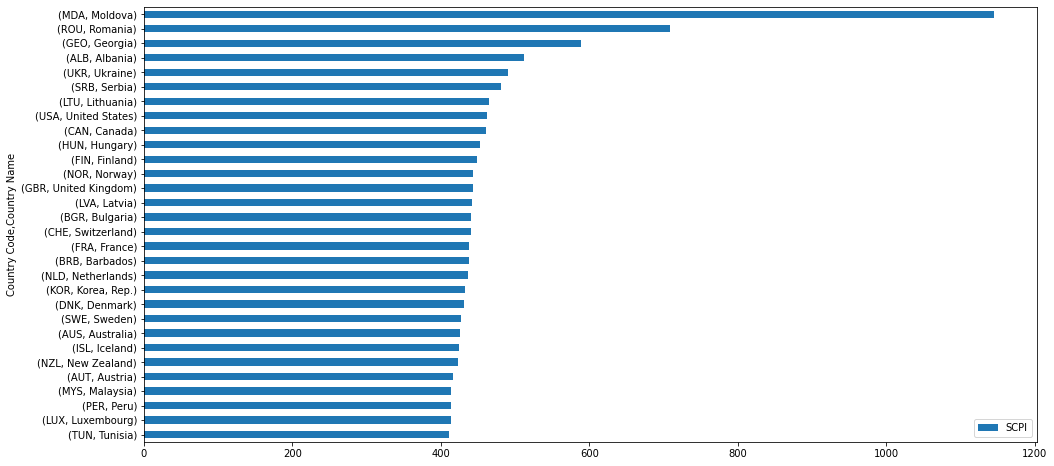

In [361]:
df1.head(30).sort_values('SCPI', ascending=True).plot(kind='barh',figsize=(16,8))

###### TOP 3 PAYS

In [354]:
df1.head(3)

,,SCPI
Country Code,Country Name,
MDA,Moldova,1145.65
ROU,Romania,708.60
GEO,Georgia,589.21


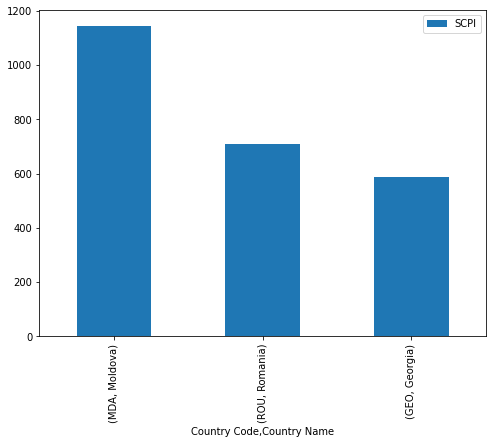

In [355]:

df1.head(3).plot(kind='bar',figsize=(8,6))

##### CALCUL  SCORE FINAL PAR REGION


In [356]:
df_gby_region=df.groupby(['Region'])['SCPI'].sum()
df_gby_region.sort_values(ascending=False)

Region
Europe & Central Asia         21007.11
Sub-Saharan Africa            15880.99
Latin America & Caribbean     12909.24
East Asia & Pacific           11452.68
Middle East & North Africa     7599.47
South Asia                     2595.36
North America                  1315.18
Name: SCPI, dtype: float64

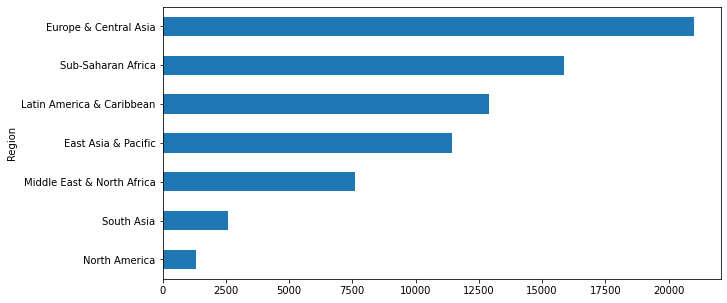

In [357]:
df_gby_region.sort_values(ascending=True).plot(kind='barh',figsize=(10,5))

###### CONCLUSION


3 pays se degagent les plus innattendus 

Resultat a prendre avec precaution.

Pour l etude je conseille d integrer des donnees d 

autres sources telles que les donnees de data-population (https://www.populationdata.net/palmares/idh/description/)

et d autres indicateurs comme l indice de developpement 

humain.


Les regions en tete sont celle ayant une population 

elevée. Il serait judicieus de faire une analyse plus

pussée sur le choix des coefficients.